<a href="https://colab.research.google.com/github/almostoutlier/Projects/blob/main/Flights_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Delay Prediction using Machine Learning Techniques

**Data Source:** https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv

* This dataset contains information about flights in three modules; Airlines, Airports and Flights.
* All the required data is present in "Flights" module. This includes flight details, departure and arrival airports, flight delays, cancellations and reasons for the same.
* Using this data we will predict the status of the flight and the corresponding reason.

**Objectives:**
1. If a flight will be on time/ delayed/ cancelled? (Multi Class Classification Model)
2. If the Flight is being delayed, what could be the reason for it? (Multilabel Classification Model)
3. If the flight is being delayed, by how many minutes it is going to get delayed? (Regression Model)

The project will will be executed in the following steps:
1. Data Exploration
2. Data Cleaning
3. Data Processing
4. Feature Selection
5. Exploratory Data Analysis of Preprocessed Data
    
    5.1. Delayed vs. Cancelled (Multiclass Classification)

    5.2. Reason for Flight Delay (Multilabel Classification)
    
    5.3. Flight Delay Prediction in Minutes (Regression Analysis)
6. Model Training

    6.1. Delayed vs. Cancelled (Multiclass Classification) Model Training

    6.2. Reason for Flight Delay (Multilabel Classification) Model Training
    
    6.3. Flight Delay Prediction in Minutes (Regression Analysis) Model Training
7. Model Evaluation
8. Model Prediction
9. Conclusion


# **Importing Neccessary Libraries**

* visualization: matplolib, seaborn
* data manipulation: pandas, numpy
* modeling: sklearn
* class definition: regression, figures

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#Multi label algorithm
from sklearn.multioutput import MultiOutputClassifier

#Stats Model Libraries
from statsmodels.formula.api import ols
import statsmodels.api as sm

#algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score, hamming_loss, multilabel_confusion_matrix, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import pylab
import scipy.stats as stats

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Data Exploration**




In [ ]:
airlines = pd.read_csv("/content/drive/MyDrive/Flights/airlines.csv")
airlines.head(14)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


**Data Description**
1. **IATA_Code:** Airline Identifier
2. **Airline:** Name of the Airline

In [ ]:
airports = pd.read_csv("/content/drive/MyDrive/Flights/airports.csv")
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


**Data Description**
1. **IATA_Code:** Location Identifier
2. **Airport:** Airport Name
3. **City:** City in which airport is located
4. **State:** State in which airport is located
5. **Country:** Country in which Airport is located
6. **Latitude:** Latitude of the Airport
7. **Longitude:** longitude of the Airport

In [ ]:
flights = pd.read_csv("/content/drive/MyDrive/Flights/flights.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Data Description**

1. **Year:** Year of the flight trip
2. **Month:** month of the flight trip
3. **Day:** Day of the flight trip
4. **Day of the flight trip:** Day of week of the flight trip
5. **Airline:** Airline Identifier
6. **Flight_Number:** Flight Identifier
7. **Tail_Number:** Aircraft Identifier
8. **Origin_Airport:** Starting Airport
9. **Destination_Airport:** Landing Airport
10. **Scheduled_Departure:** Time at which aircraft is supposed to depart.
11. **Departure_Time:** Time at which it actually departed.
12. **Departure_Delay:** Total delay in departure
13. **Taxi_Out:** The time duration elapsed between departure from the origin airport gate and wheels off
14. **Wheel_Off:** The time point that the aircraft's wheels leave the ground
15. **Scheduled_Time:** Planned time amount needed for the flight trip
16. **Elasped_Time:** Air_Time+Taxi_In+Taxi_Out
17. **Air_Time:** The time duration between wheels_off and wheels_on time
18. **Distance:** Distance between two airports
19. **Wheels_On:** The time point that the aircraft's wheels touch on the ground
20. **Taxi_In:** The time duration elapsed between wheels-on and gate arrival at the destination airport
21. **Scheduled_Arrival:** Planned arrival time
22. **Arrival_Time:** Wheels_On+Taxi_In
23. **Arrival_Delay:** Arrival_TIime - Schedules_Arrival
24. **Diverted:** Aircraft landed on airport that out of schedule
25. **Canceled:** Flight Canceled (1 = canceled)
26. **Cancellation_Reason:** Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
27. **Air_System_Delay:** Delay caused by air system
28. **Security_Delay:** Delay caused by security
29. **Airline_Delay:** Delay caused by the airline
30. **Late_Aircraft_Delay:** Delay caused by aircraft
31. **Weather_Delay:** Delay caused by weather





















In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
flights.isnull()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
5819075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
5819076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
5819077,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [ ]:
#checking unique values in each column
flights.nunique()

YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          930
DESTINATION_AIRPORT     930
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64


**Observations:**
*   There is only one value in the year column and can be dropped.
*   Tail Number can be dropped as it won't add any value to the data.



In [ ]:
num_cols= ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
cat_cols=['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLATION_REASON']

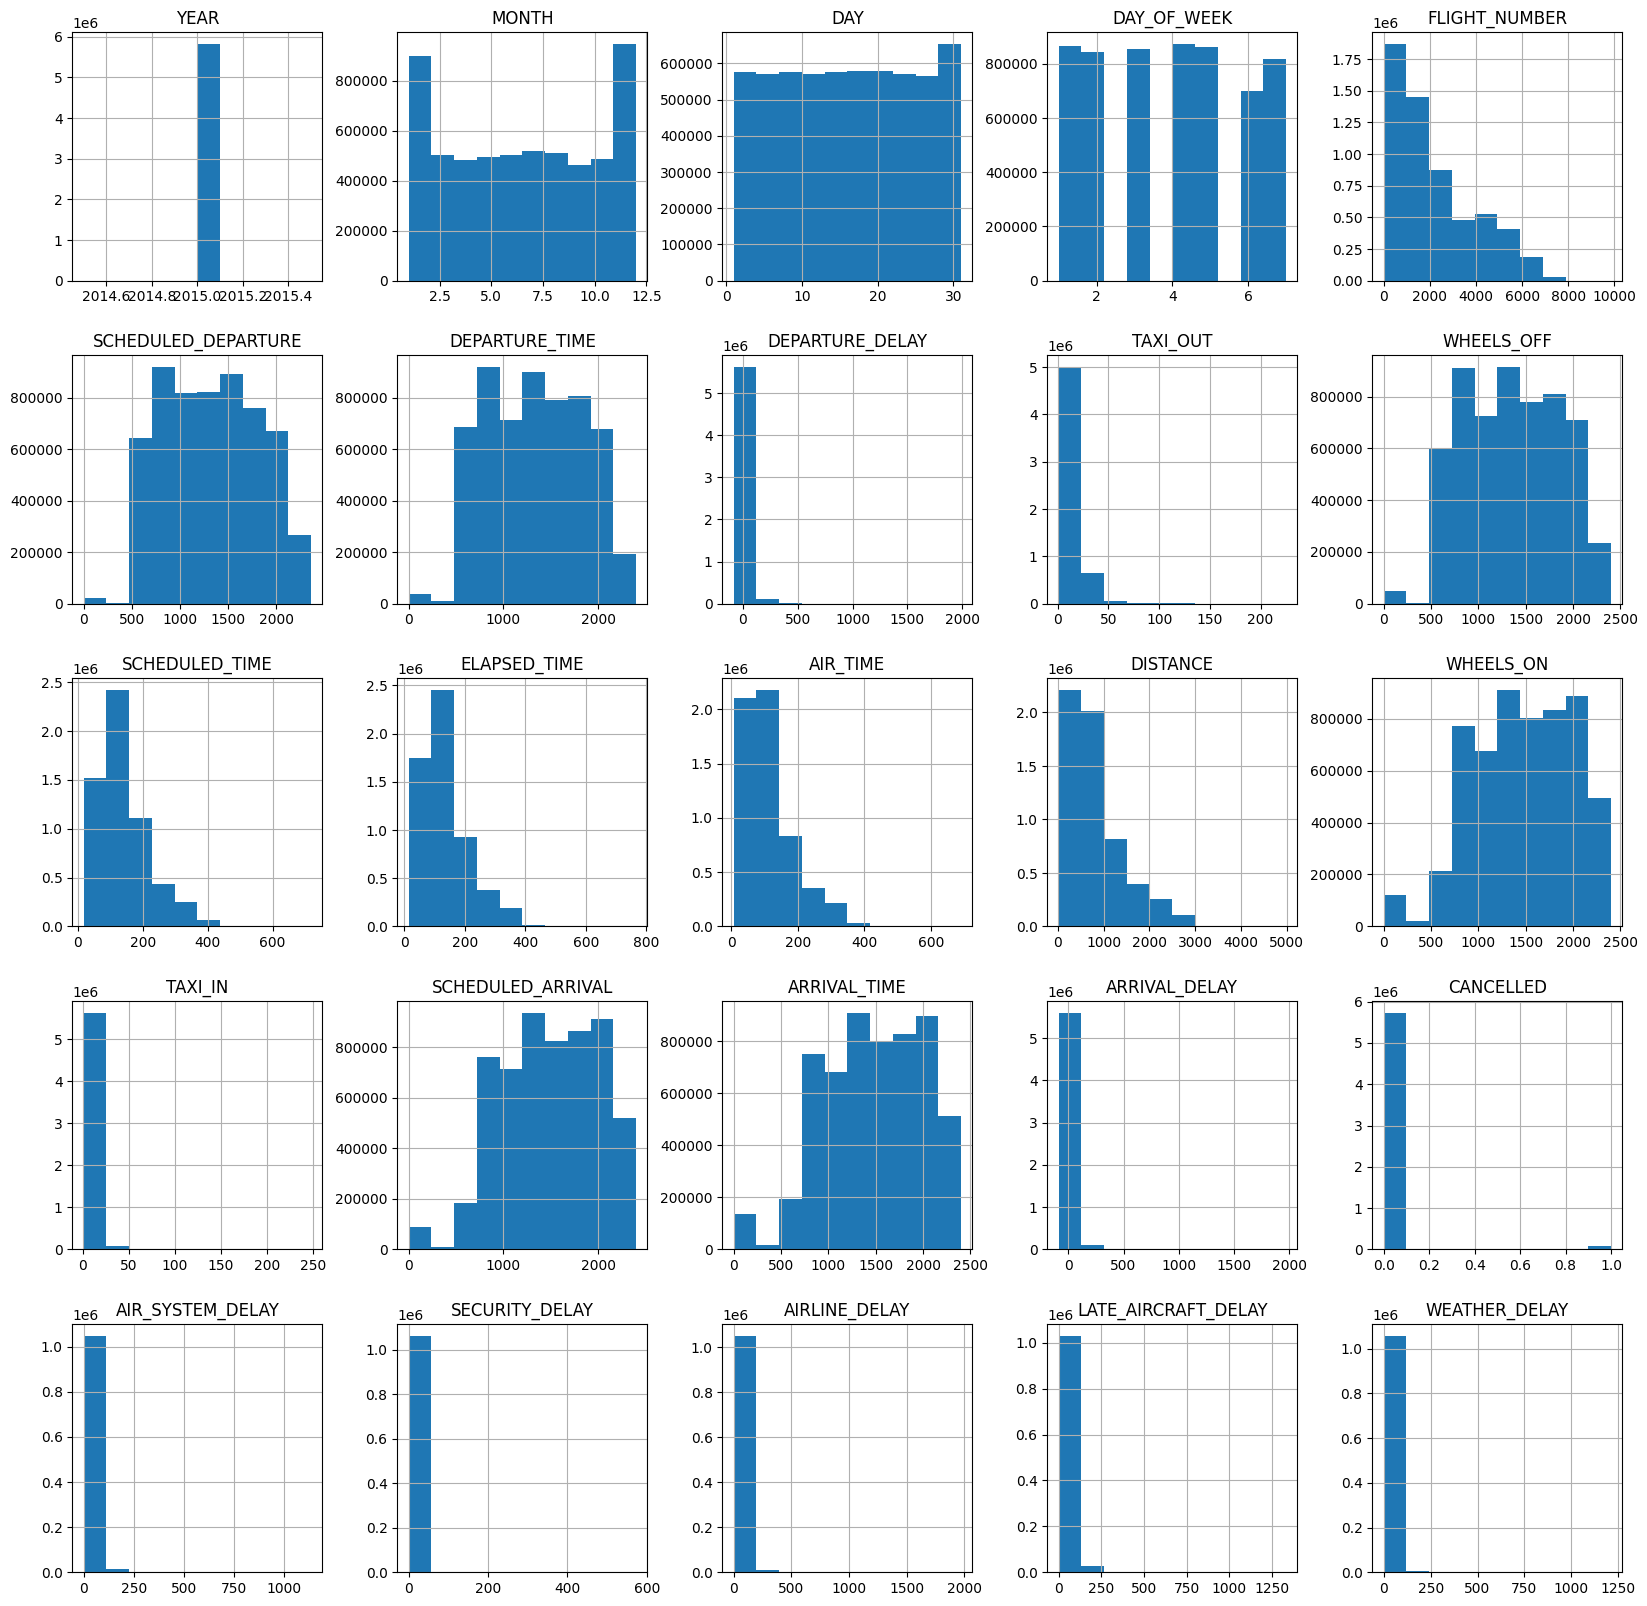

In [ ]:
flights[num_cols].hist(figsize=(20,20))
plt.show()

**Observations:**
* Scheduled_Time, Elapsed_Time, Air_Time, Distance, Taxi_In, Arrival_Delay, Cancelled, Air_System_Delay, Security_Delay, Airine_Delay, Late_Aircraft_Delay, Weather_Delay, Departure_Delay, Taxi_Out are the variables that are right positive skewed in the datset.

* There are many delays in the begining of 2015 year and the delays are spread throughout the month of the year. There are more delays in the even days of the week than the odd days of the week.

* Air_System_Delay, Security_Delay, Airine_Delay, Late_Aircraft_Delay, Weather_Delay are mostly below 250 minutes for all the flights.



In [ ]:
flights[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5819079.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5819079.0,6.524085,3.405137,1.0,4.0,7.0,9.0,12.0
DAY,5819079.0,15.704594,8.783425,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5819079.0,3.926941,1.988845,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5819079.0,2173.092742,1757.063999,1.0,730.0,1690.0,3230.0,9855.0
SCHEDULED_DEPARTURE,5819079.0,1329.602470,483.751821,1.0,917.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5732926.0,1335.204439,496.423260,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5732926.0,9.370158,37.080942,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5730032.0,16.071662,8.895574,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5730032.0,1357.170841,498.009356,1.0,935.0,1343.0,1754.0,2400.0


**Observations:**
* Departure_delay is 9.3 minutes on an average  with high standard deviation. Taxi_In time is low as there is less delay between wheels on and arrival time at the arrival airport. There are a few outliers in Taxi_In time such as the maximum delay of 248 minutes.

In [ ]:
for i in cat_cols:
    print(flights[i].value_counts(normalize=True))
    print('*'*40)

AIRLINE
WN    0.216848
DL    0.150519
AA    0.124759
OO    0.101108
EV    0.098293
UA    0.088626
MQ    0.050632
B6    0.045892
US    0.034149
AS    0.029647
NK    0.020171
F9    0.015610
HA    0.013107
VX    0.010638
Name: proportion, dtype: float64
****************************************
TAIL_NUMBER
N480HA    6.491674e-04
N488HA    6.414146e-04
N484HA    6.414146e-04
N493HA    6.176394e-04
N478HA    6.162611e-04
              ...     
N175UA    1.722843e-07
N852NW    1.722843e-07
N7LBAA    1.722843e-07
N7LEAA    1.722843e-07
N180UA    1.722843e-07
Name: proportion, Length: 4897, dtype: float64
****************************************
ORIGIN_AIRPORT
ATL      5.960325e-02
ORD      4.912874e-02
DFW      4.116648e-02
DEN      3.369176e-02
LAX      3.345426e-02
             ...     
11503    1.718485e-07
14222    1.718485e-07
13964    1.718485e-07
13459    1.718485e-07
12265    1.718485e-07
Name: proportion, Length: 930, dtype: float64
****************************************
DESTINATION

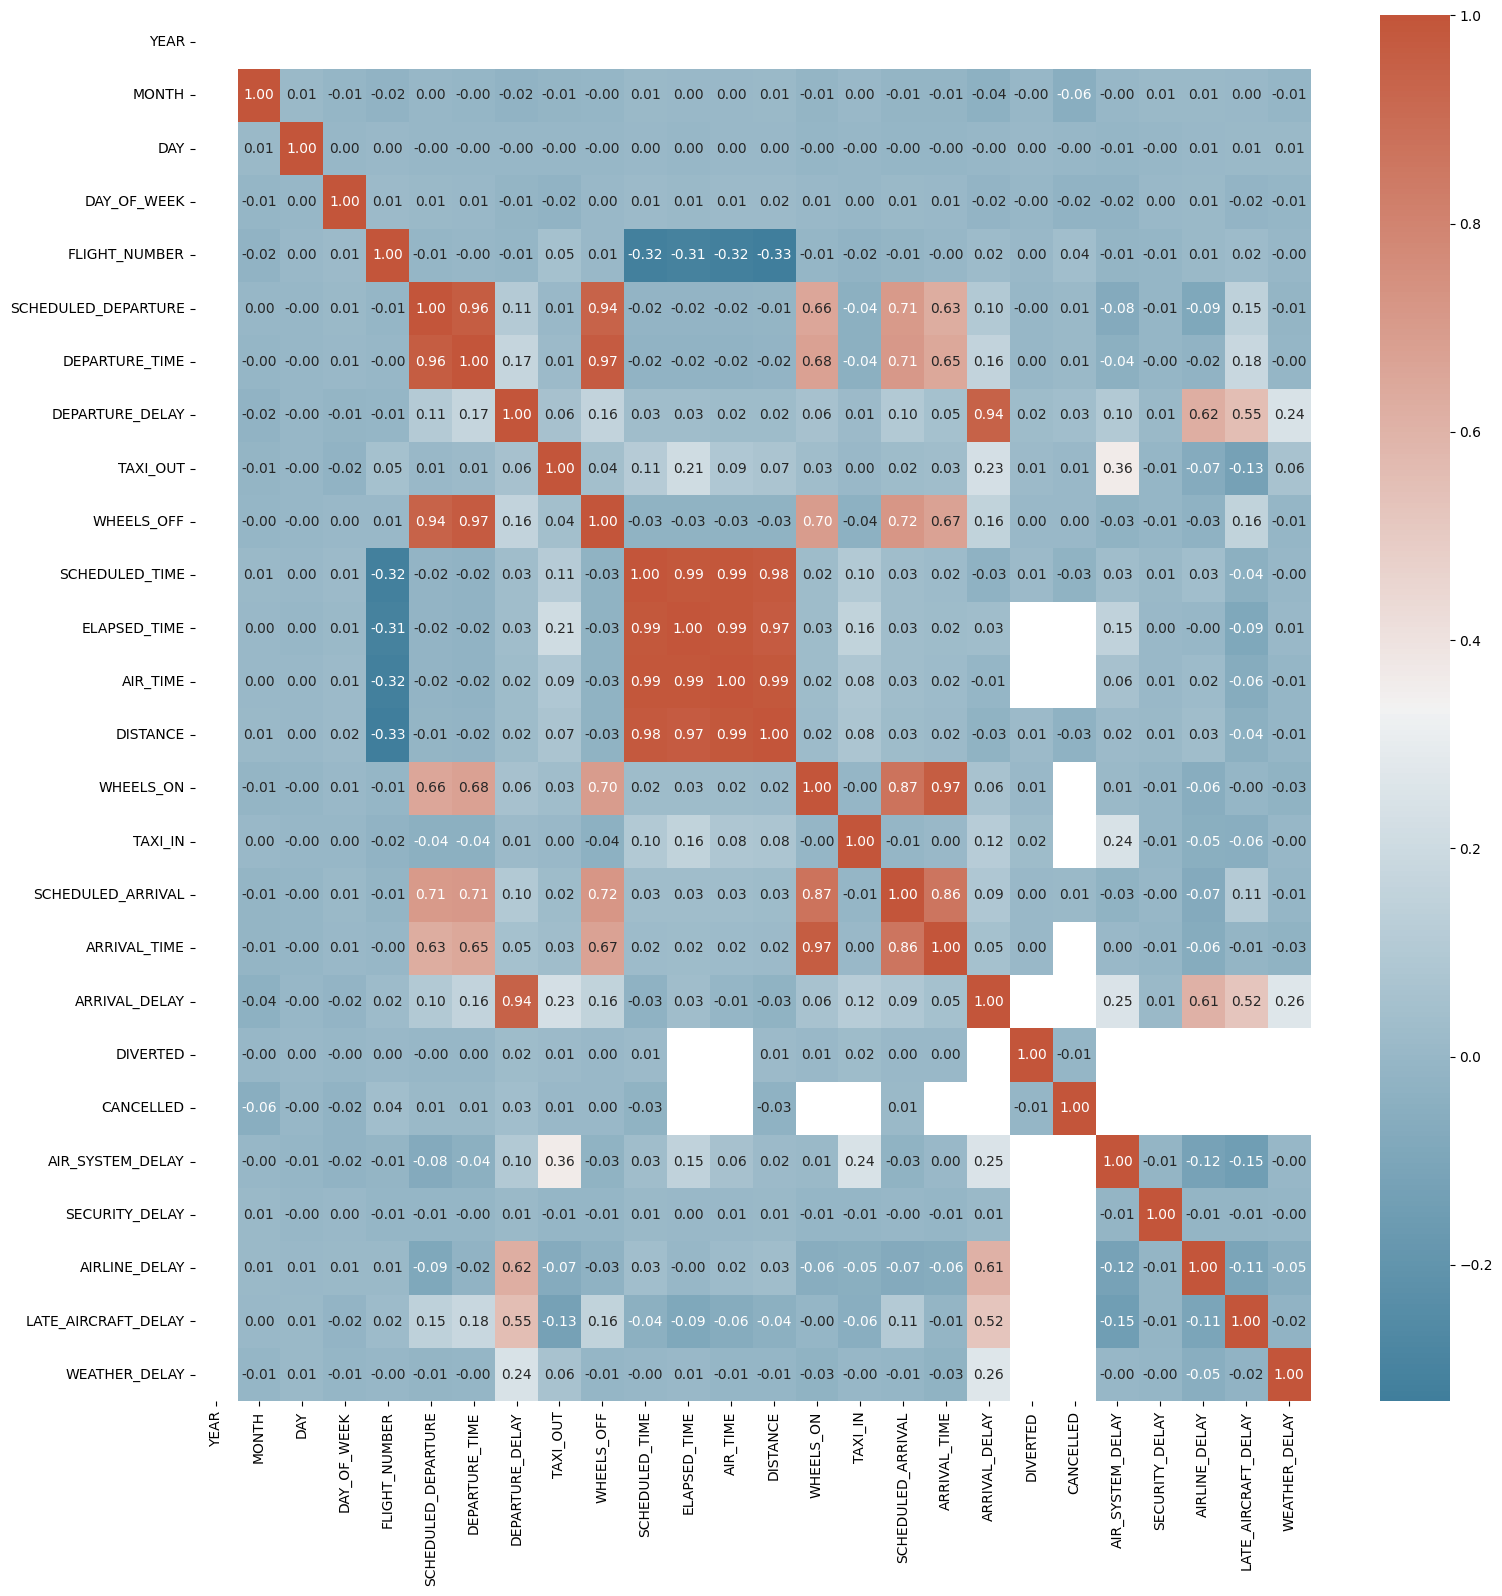

In [ ]:
plt.figure(figsize=(18,18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(flights.corr(numeric_only=True))

# Create a visual view of the pairwise correlations
sns.heatmap(flights.corr(numeric_only=True),annot=True,fmt='.2f',cmap=cmap)
plt.show()

**Observations:**
* From the correlation matrix, Scheduled_Departure, Departure_Time are oddly highly correlated with Wheels_Off with 94% positive correlation.
* Parallely, Scheduled_Time, Elapsed_Time, Air_Time and Distance are highly positively correlated showing they are infuential in the flight delays.

In [ ]:
needed_num_cols= ['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'AIR_TIME', 'ARRIVAL_DELAY', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','DIVERTED']
needed_cat_cols=['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLATION_REASON']
df=flights[needed_num_cols + needed_cat_cols]

# **2. Data Cleaning**

In [ ]:
df = df[df['DIVERTED'] == 0]
df=df.drop('DIVERTED', axis=1)
df.head()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,AIR_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
0,1,1,4,98,5,169.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,AS,ANC,SEA,NaN
1,1,1,4,2336,10,263.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,AA,LAX,PBI,NaN
2,1,1,4,840,20,266.0,5.0,0,NaN,NaN,NaN,NaN,NaN,US,SFO,CLT,NaN
3,1,1,4,258,20,258.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,AA,LAX,MIA,NaN
4,1,1,4,135,25,199.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,AS,SEA,ANC,NaN




*   15187 entries with flights diverted are droped from the dataset as they are not of our interest.
*   "DIVERTED' column is also dropped from the dataset.
*   The total number of rows after removing these entries are 5,803,892.



# **3. Data Preprocessing**

In [ ]:
df["CANCELLATION_REASON"].fillna("NC", inplace = True)
df["AIR_SYSTEM_DELAY"].fillna(0, inplace = True)
df["SECURITY_DELAY"].fillna(0, inplace = True)
df["AIRLINE_DELAY"].fillna(0, inplace = True)
df["LATE_AIRCRAFT_DELAY"].fillna(0, inplace = True)
df["WEATHER_DELAY"].fillna(0, inplace = True)

In [ ]:
df[df.columns[df.isnull().any()]].isnull().sum()

AIR_TIME         89884
ARRIVAL_DELAY    89884
dtype: int64

**Observations:**
* 89884 rows of null values in AIR_TIME and ARRIVAL_DELAY are due to the cancelled flight. Thus, these values are replaced by 0's

In [ ]:
df["AIR_TIME"].fillna(0, inplace = True)
df["ARRIVAL_DELAY"].fillna(0, inplace = True)

In [ ]:
conditions = [
    (df['ARRIVAL_DELAY'] >= 15),
    (df['CANCELLED'] == 0),
    (df['CANCELLED'] == 1)
    ]

# create a list of the values we want to assign for each condition
values = ['D', 'N', 'C']

# df=df.drop('CANCELLED', axis=1)
# needed_num_cols.remove("CANCELLED")

# create a new column and use np.select to assign values to it using our lists as arguments
df['FLIGHT_STATUS'] = np.select(conditions, values)
needed_cat_cols.append('FLIGHT_STATUS')

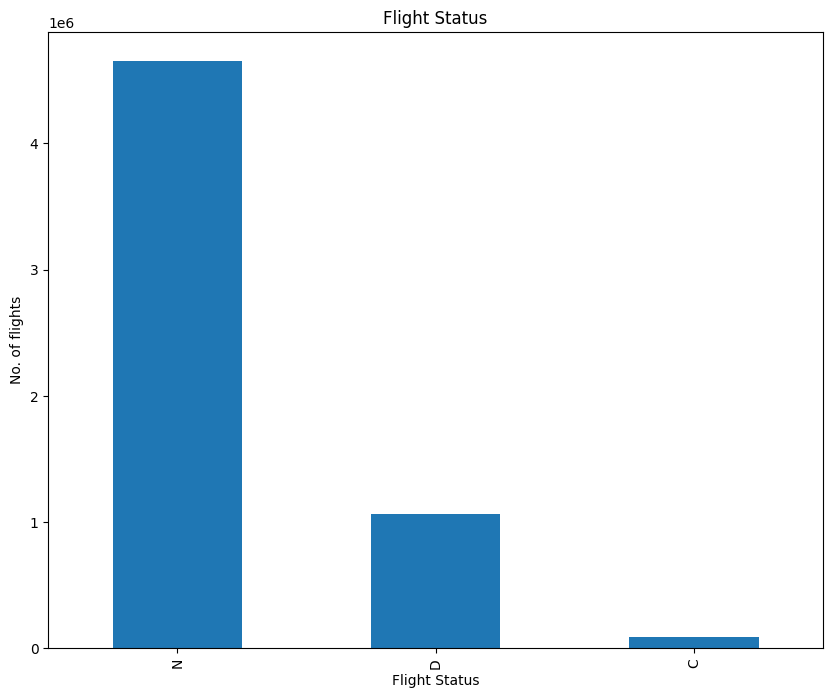

In [ ]:
df['FLIGHT_STATUS'].value_counts().plot(kind='bar',figsize=(10,8))

plt.xlabel("Flight Status")
plt.ylabel("No. of flights")
plt.title("Flight Status")
plt.show()

In [ ]:
# Filter the DataFrame to select only cancellation flights
cancellation_flights = df[df['FLIGHT_STATUS'] == 'C']

# Calculate the total number of cancellation flights
total_cancellation_flights = len(cancellation_flights)

print("Total number of cancellation flights:", total_cancellation_flights)


Total number of cancellation flights: 87430


**Observations:**
* There are three flight delay statuses. Flight having the status of delayed are significant compared to the other two.
* Flight which are cancelled comprise of very less proportion in the dataset.

In [ ]:
df['AIR_SYSTEM_DELAY'] = np.where(df['AIR_SYSTEM_DELAY'] > 0, 1, 0)
df['SECURITY_DELAY'] = np.where(df['SECURITY_DELAY'] > 0 , 1, 0)
df['AIRLINE_DELAY'] = np.where(df['AIRLINE_DELAY'] > 0, 1, 0)
df['LATE_AIRCRAFT_DELAY'] = np.where(df['LATE_AIRCRAFT_DELAY'] > 0, 1, 0)
df['WEATHER_DELAY'] = np.where(df['WEATHER_DELAY'] > 0, 1, 0)

* All the delay reason columns having values greater than one are replaced by 1's and null values are replaced by 0's to signify the reason for delay.

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0             90.27           99.94          90.18                 90.4   
1              9.73            0.06           9.82                  9.6   

   WEATHER_DELAY  
0          98.88  
1           1.12  


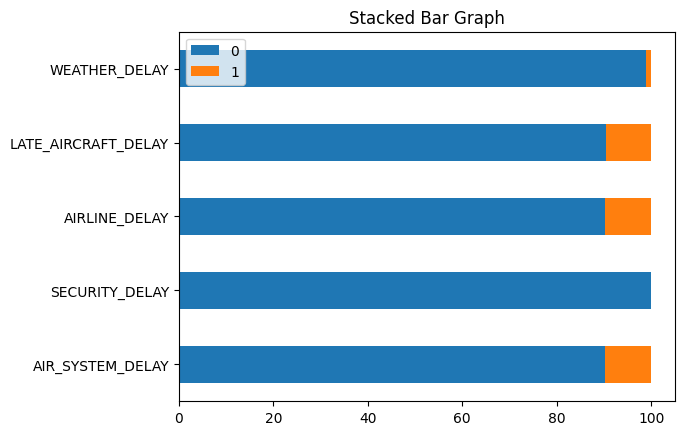

In [ ]:
t=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
tmp=df[t]

tmp = tmp.apply(lambda x: (x.value_counts(normalize=True) * 100).round(2))

print(tmp)
tmp = pd.concat([tmp[col] for col in tmp.columns], axis=1)
tmp=tmp.transpose()

# Plotting all columns in a single plot
tmp.plot(kind='barh', stacked=True, title='Stacked Bar Graph')

# Display the plot
plt.show()

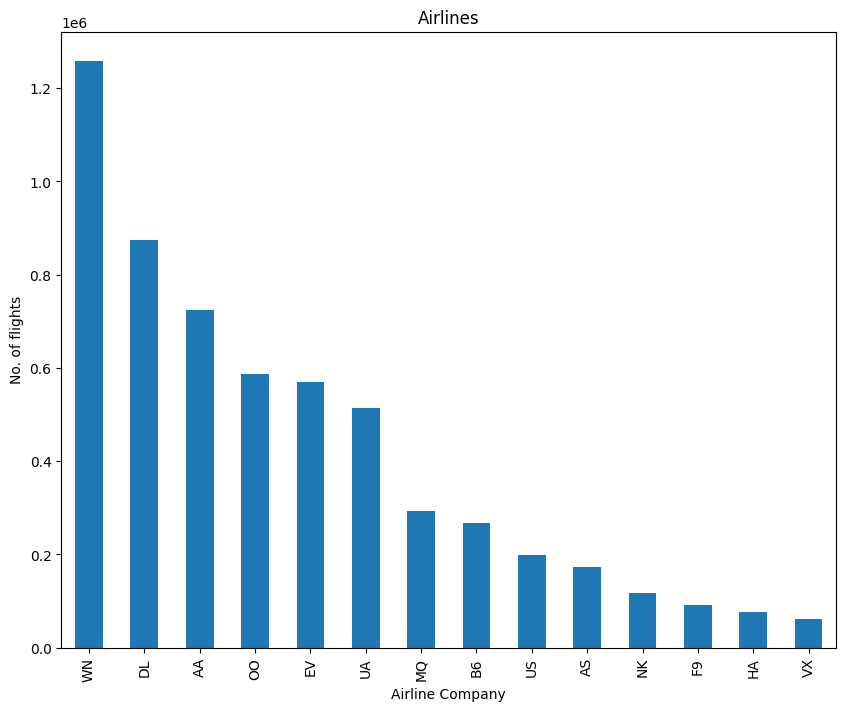

In [ ]:
df['AIRLINE'].value_counts().plot(kind='bar',figsize=(10,8))

plt.xlabel("Airline Company")
plt.ylabel("No. of flights")
plt.title("Airlines")
plt.show()

**Observations:**
* The bar graph plots the number of flights each airline company owns. SouthWest Airlines, Delta Airlines have most functioning aircrafts. Hawaian Airlines, Virgin American Airlines have least flights in the dataset.

CANCELLATION_REASON
B    0.008417
A    0.004353
C    0.002714
D    0.000004
Name: proportion, dtype: float64


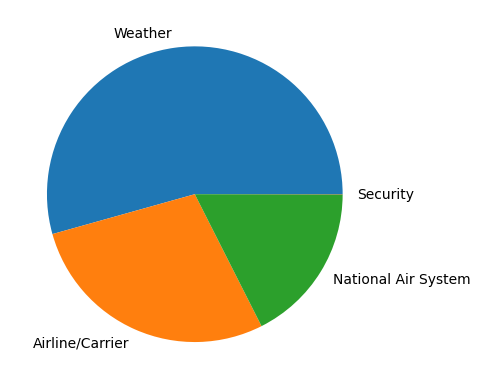

In [ ]:
tmp=df['CANCELLATION_REASON'].value_counts(normalize=True)
tmp=tmp.drop('NC')
l=["Weather", "Airline/Carrier", "National Air System", "Security"]
print(tmp)
plt.pie(tmp, labels=l)
plt.show()



**Observations:**


*   There are 5819079 observations and 31 columns in the dataframe.
*   There fours reasons for a flight that is being cancelled.
      * A - Airline/ carrier
      * B - Weather
      * C - National Air System
      * D - Security
*   Entries with arrival delay of 14 or less minutes do not have any particular reason for delay.
*   All of the null values in "CANCELLATION_REASON" are replaced with "NC"
*   All of the null values in "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY" are replaced by 0's.






**Observations:**
* Athough cancellations happen rarely, Weather is a major reason for flight cancellations followed by Airline/Carrier, National Air System and Security.

CANCELLATION_REASON
B    0.031190
C    0.011521
A    0.008424
D    0.000003
Name: proportion, dtype: float64


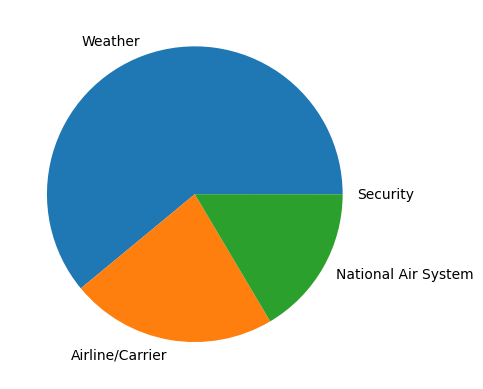

In [ ]:
# Filter the DataFrame to select only the rows where the value in the "airlines" column is "MQ"
df_filtered = df[df['AIRLINE'] == 'MQ']

# Calculate the cancellation reasons and normalize the values
tmp = df_filtered['CANCELLATION_REASON'].value_counts(normalize=True)

# Drop the 'NC' cancellation reason if present
tmp = tmp.drop('NC')
print(tmp)

# Define labels for the pie chart
l = ["Weather", "Airline/Carrier", "National Air System", "Security"]

# Plot the pie chart
plt.pie(tmp, labels=l)
plt.show()


In [ ]:
df.shape

(5803892, 18)

In [ ]:
filter1 = df["DESTINATION_AIRPORT"].isin(airports['IATA_CODE'])
filter2 = df["ORIGIN_AIRPORT"].isin(airports['IATA_CODE'])

# displaying data with both filter applied and mandatory
temp_df=df[filter1 & filter2]
temp_df.shape

(5318560, 18)

**Observations**
* The dataframe was filtered to exclude the incorrect values from DESTINATION_AIRPORT and ORIGIN_AIRPORT columns. The dataframe now has 5318560 entries.

In [ ]:
temp_df.nunique()

MONTH                    11
DAY                      31
DAY_OF_WEEK               7
FLIGHT_NUMBER          6952
SCHEDULED_DEPARTURE    1318
AIR_TIME                676
ARRIVAL_DELAY          1222
CANCELLED                 2
AIR_SYSTEM_DELAY          2
SECURITY_DELAY            2
AIRLINE_DELAY             2
LATE_AIRCRAFT_DELAY       2
WEATHER_DELAY             2
AIRLINE                  14
ORIGIN_AIRPORT          322
DESTINATION_AIRPORT     322
CANCELLATION_REASON       5
FLIGHT_STATUS             3
dtype: int64

In [ ]:
location_state=airports[['IATA_CODE', 'STATE']]
location_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  322 non-null    object
 1   STATE      322 non-null    object
dtypes: object(2)
memory usage: 5.2+ KB


There are only 322 airports in our airports database.

In [ ]:
temp_df=temp_df.merge(location_state, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')
temp_df.rename(columns={'STATE': 'DESTINATION_STATE'}, inplace=True)
temp_df=temp_df.drop('IATA_CODE', axis=1)

*added destination state column according to airport*

In [ ]:
temp_df=temp_df.merge(location_state, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
temp_df.rename(columns={'STATE': 'ORIGIN_STATE'}, inplace=True)
temp_df=temp_df.drop('IATA_CODE', axis=1)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318560 entries, 0 to 5318559
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   FLIGHT_NUMBER        int64  
 4   SCHEDULED_DEPARTURE  int64  
 5   AIR_TIME             float64
 6   ARRIVAL_DELAY        float64
 7   CANCELLED            int64  
 8   AIR_SYSTEM_DELAY     int64  
 9   SECURITY_DELAY       int64  
 10  AIRLINE_DELAY        int64  
 11  LATE_AIRCRAFT_DELAY  int64  
 12  WEATHER_DELAY        int64  
 13  AIRLINE              object 
 14  ORIGIN_AIRPORT       object 
 15  DESTINATION_AIRPORT  object 
 16  CANCELLATION_REASON  object 
 17  FLIGHT_STATUS        object 
 18  DESTINATION_STATE    object 
 19  ORIGIN_STATE         object 
dtypes: float64(2), int64(11), object(7)
memory usage: 811.5+ MB


*added origin state column according to airport*

In [ ]:
temp_df[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DESTINATION_STATE', 'ORIGIN_STATE']].nunique()

ORIGIN_AIRPORT         322
DESTINATION_AIRPORT    322
DESTINATION_STATE       54
ORIGIN_STATE            54
dtype: int64

In [ ]:
West = ['WA','OR','MT','ID','WY','NV','CA','UT','CO','AZ','NM']
d1 = dict.fromkeys(West, 'West')

Midwest = ['ND','SD','NE','KS','MN','IA','MO','WI','MI','IL','IN','OH']
d2 = dict.fromkeys(Midwest, 'Midwest')

South = ['TX','OK','AR','LA','MS','TN','AL','GA','FL','SC','NC','KY','WV','VA','MD','DE']
d3 = dict.fromkeys(South, 'South')

Northeast = ['NY','NJ','PA','CT','MA','RI','NH','VT','ME']
d4 = dict.fromkeys(Northeast, 'Northeast')

Territories = ['HI','AK','PR','VI','GU','AS']
d5 = dict.fromkeys(Territories, 'Territories')

d = {**d1, **d2, **d3, **d4, **d5}

temp_df['DESTINATION_REGION']=temp_df['DESTINATION_STATE'].map(d)
temp_df['ORIGIN_REGION']=temp_df['ORIGIN_STATE'].map(d)

**Observations**
* Two columns DESTINATION_STATE and ORIGIN_STATE were added by mapping the
states of the DESTINATION_AIRPORT and ORIGIN_AIRPORT. There are 54 unique states for both the columns.


In [ ]:
df= temp_df.drop(columns = ['DESTINATION_AIRPORT','DESTINATION_STATE','ORIGIN_AIRPORT','ORIGIN_STATE'])

**Observations**
*   The STATES were further categorized into 5 segments namely West, Midwest, South, Northeast and Territories.
*   Following columns were dropped- DESTINATION_AIRPORT, DESTINATION_STATE, ORIGIN_AIRPORT, ORIGIN_STATE



# **4. Feature Selection**

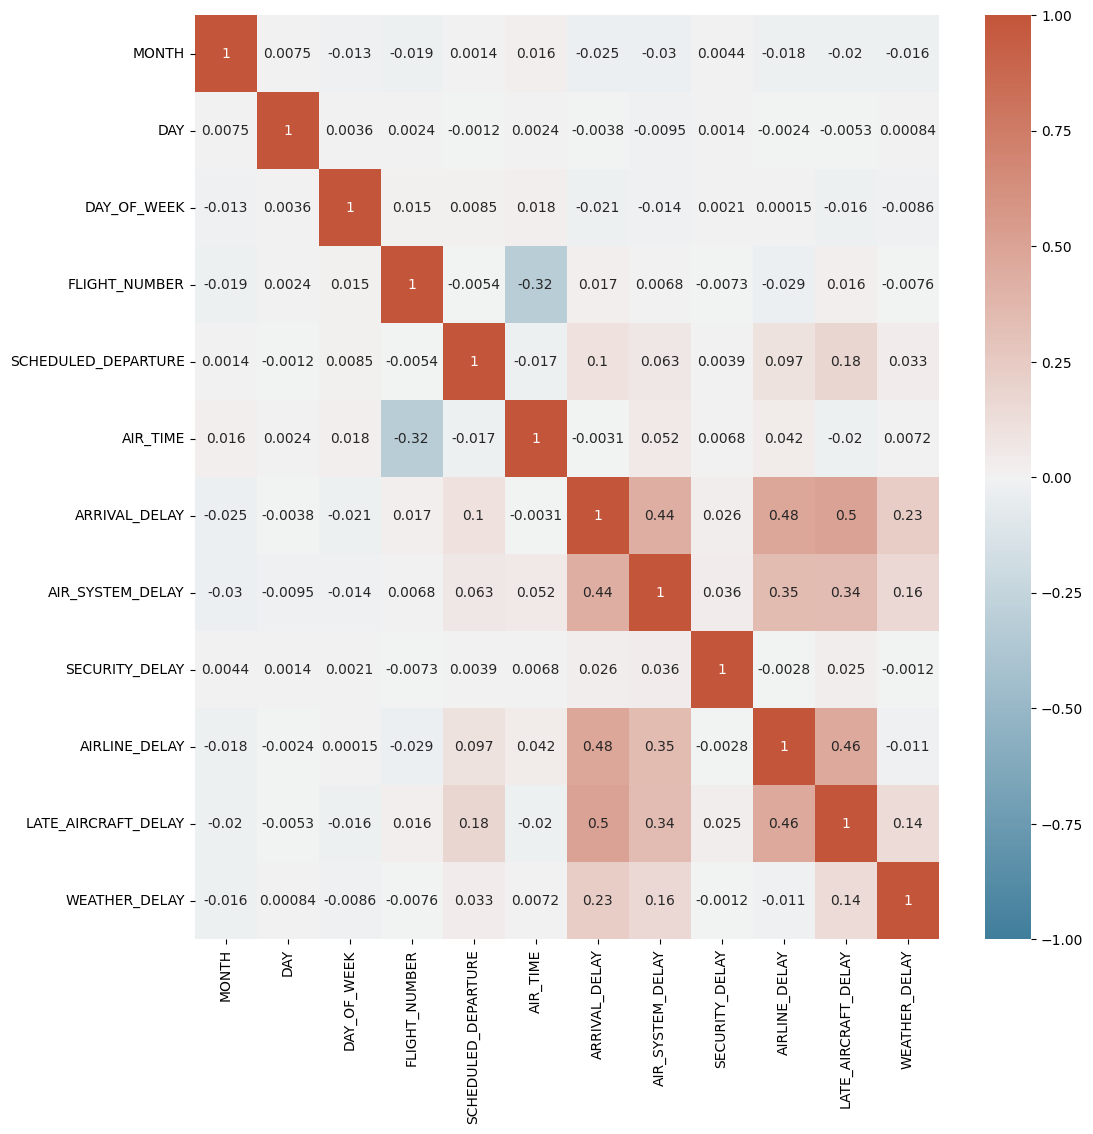

In [ ]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True , cmap=cmap)
plt.show()

**Observations:**
* In the correlation matrix, Air_Time and Flight_Number are negatively correlated. The positively correlated variables such as Days, Month do not say much about the flights being delayed in this data.

In [ ]:
needed_num_cols= ['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'AIR_TIME', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
needed_cat_cols=['AIRLINE', 'ORIGIN_REGION', 'DESTINATION_REGION', 'CANCELLATION_REASON', 'FLIGHT_STATUS']

In [ ]:
for i in needed_cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

AIRLINE
WN    0.216989
DL    0.150158
AA    0.121602
OO    0.101164
EV    0.098593
UA    0.088094
MQ    0.051119
B6    0.045962
US    0.037283
AS    0.029644
NK    0.020119
F9    0.015527
HA    0.013157
VX    0.010590
Name: proportion, dtype: float64
****************************************
ORIGIN_REGION
South          0.390150
West           0.284511
Midwest        0.181957
Northeast      0.113959
Territories    0.029424
Name: proportion, dtype: float64
****************************************
DESTINATION_REGION
South          0.390041
West           0.284574
Midwest        0.181977
Northeast      0.113973
Territories    0.029435
Name: proportion, dtype: float64
****************************************
CANCELLATION_REASON
NC    0.983561
B     0.009001
A     0.004571
C     0.002863
D     0.000004
Name: proportion, dtype: float64
****************************************
FLIGHT_STATUS
N    0.794909
D    0.188653
C    0.016439
Name: proportion, dtype: float64
*****************************

**Observations**
*   Most of the flights(approx 79%) are not cancelled and (approx 18%) of flights delayed and a very less proportion(~1.6%) getting cancelled
*   The most common airline is WN(~21%) and the least common is VX
*   Although most flights are not cancelled the most common reason for cancellation is Weather (~0.9% flights cancelled)


# **5. Exploratory Data Analysis of Preprocessed Data**

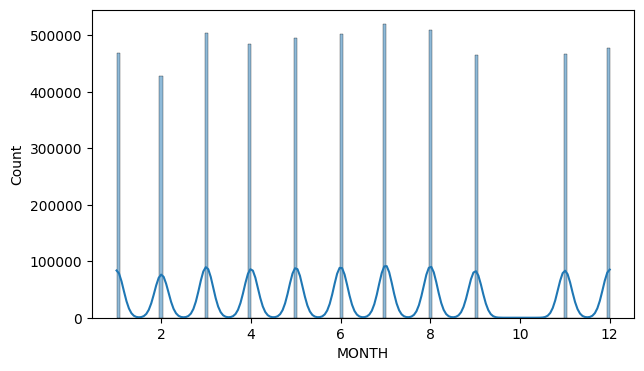

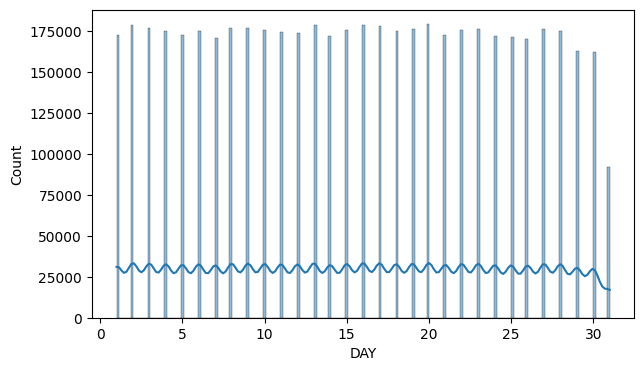

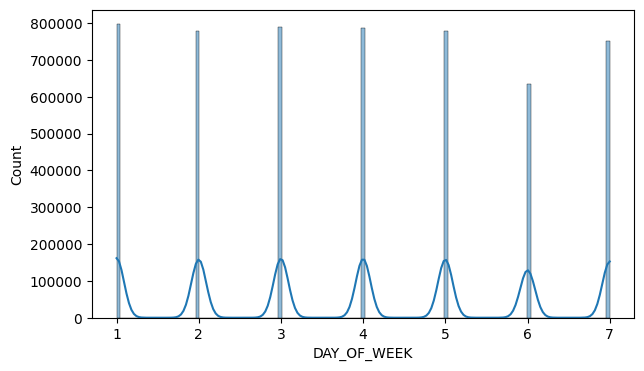

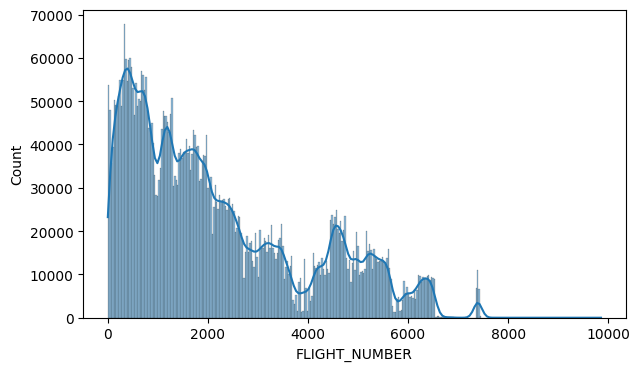

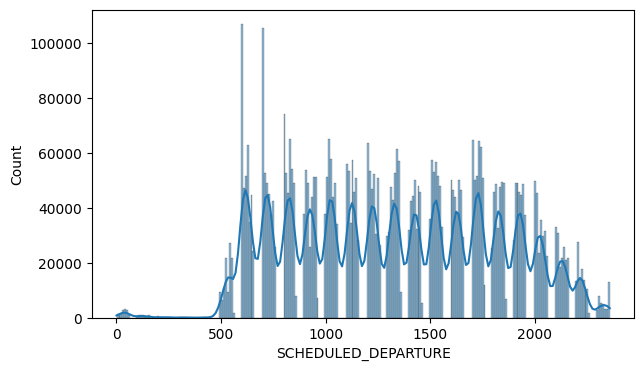

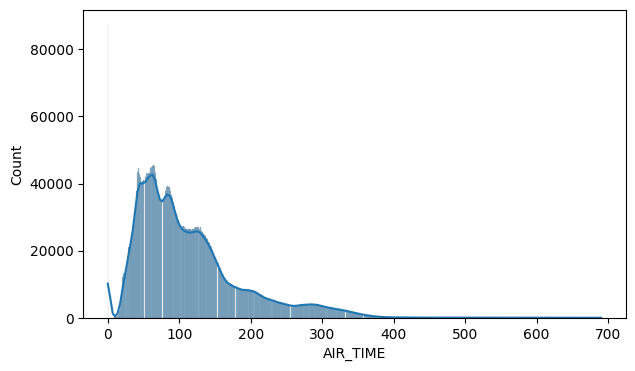

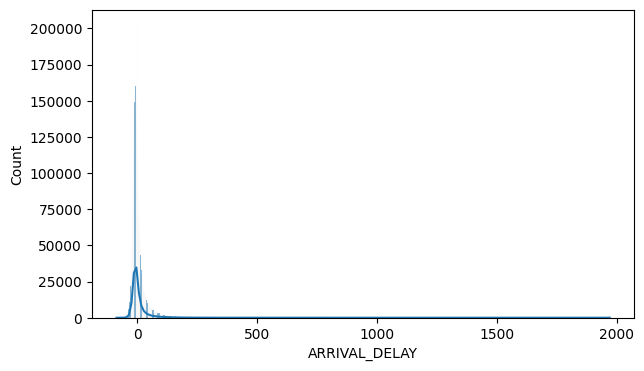

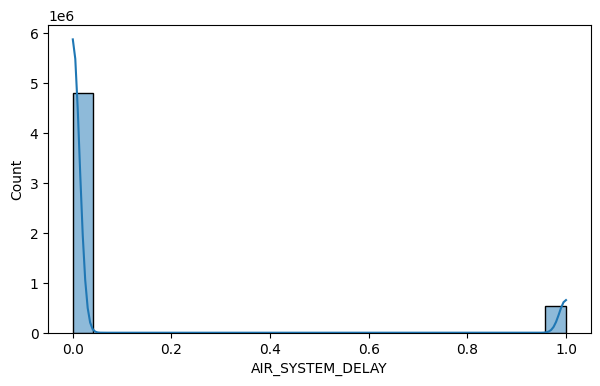

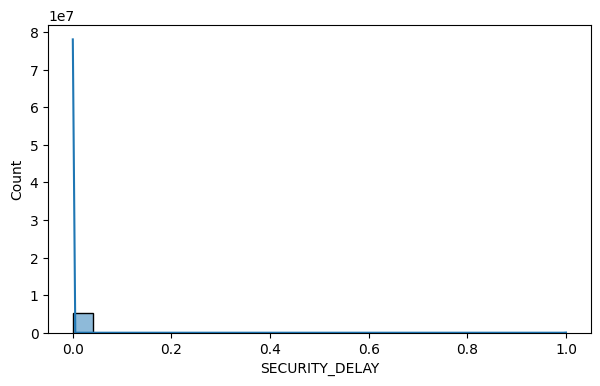

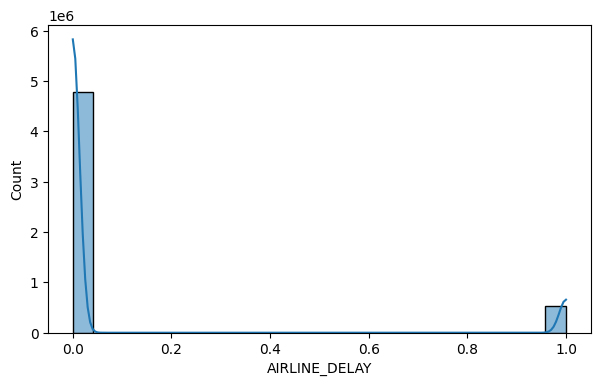

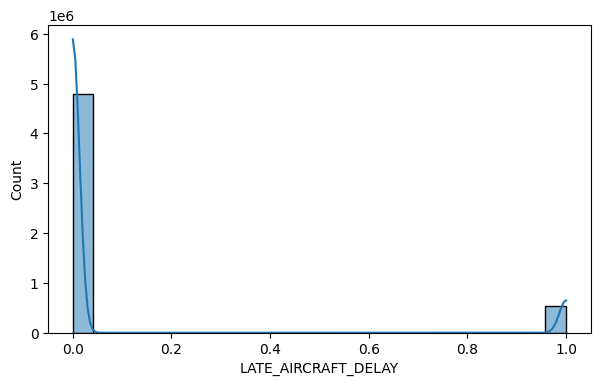

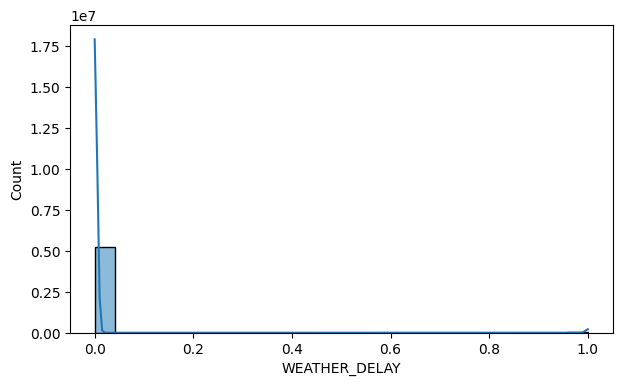

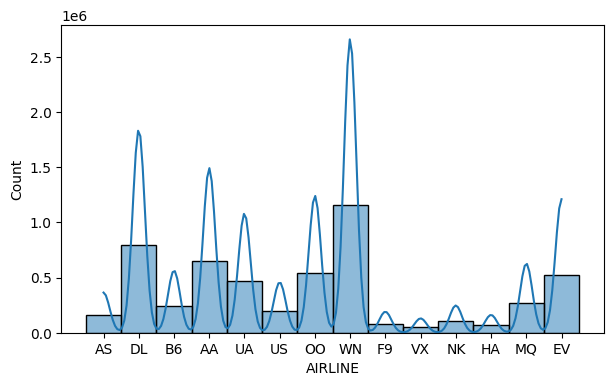

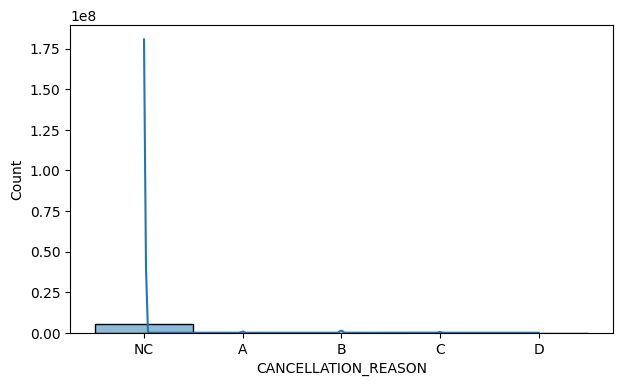

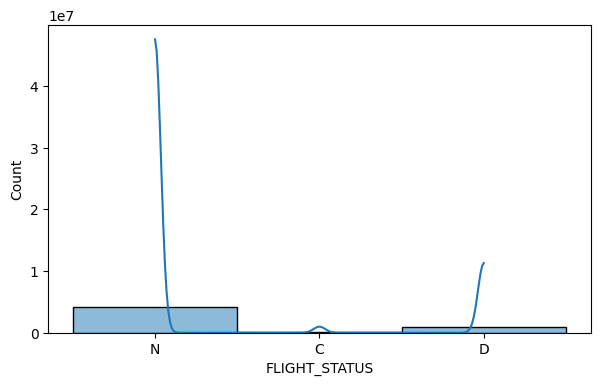

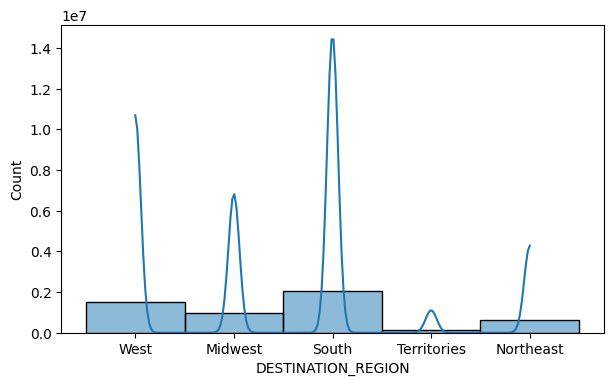

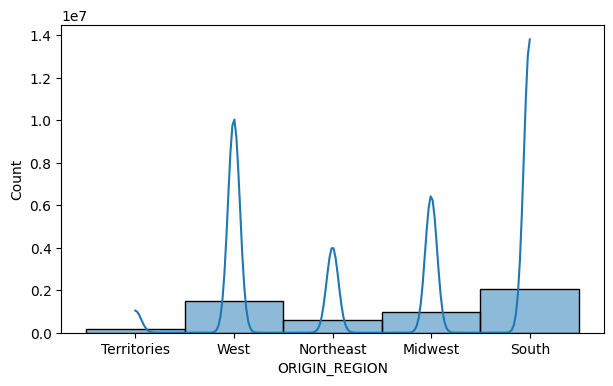

In [ ]:
for i in df.columns:
  plt.figure(figsize=(7,4))
  sns.histplot(data=df,x=i,kde=True)
  plt.show()

<Axes: xlabel='AIR_TIME'>

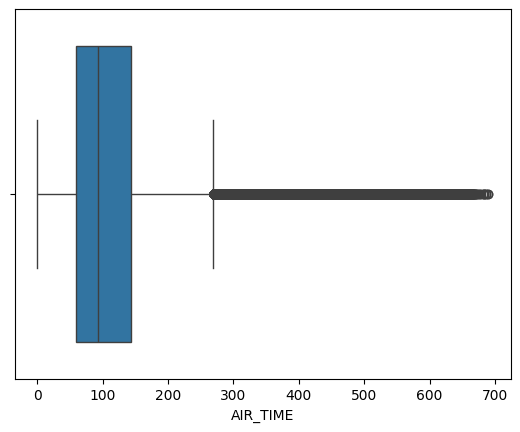

In [ ]:
sns.boxplot(x=df['AIR_TIME'])

<Axes: xlabel='ARRIVAL_DELAY'>

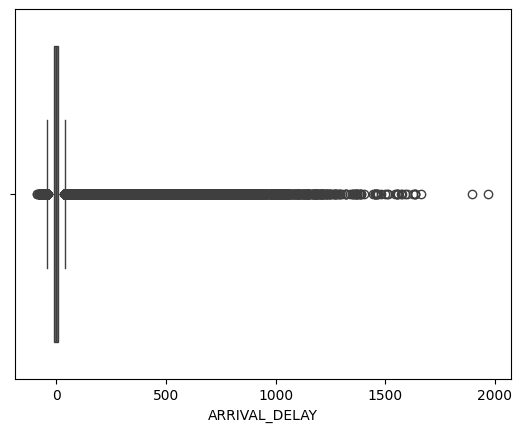

In [ ]:
sns.boxplot(x=df['ARRIVAL_DELAY'])

In [ ]:
df[['AIR_TIME', 'ARRIVAL_DELAY']].describe().T

,count,mean,std,min,25%,50%,75%,max
AIR_TIME,5318560.0,111.796882,73.143135,0.0,59.0,93.0,143.0,690.0
ARRIVAL_DELAY,5318560.0,4.805585,39.463791,-87.0,-13.0,-4.0,8.0,1971.0


In [ ]:
z = np.abs(stats.zscore(df['AIR_TIME']))
threshold = 3
outliers = df[z > threshold]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64422 entries, 6950 to 5276250
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                64422 non-null  int64  
 1   DAY                  64422 non-null  int64  
 2   DAY_OF_WEEK          64422 non-null  int64  
 3   FLIGHT_NUMBER        64422 non-null  int64  
 4   SCHEDULED_DEPARTURE  64422 non-null  int64  
 5   AIR_TIME             64422 non-null  float64
 6   ARRIVAL_DELAY        64422 non-null  float64
 7   AIR_SYSTEM_DELAY     64422 non-null  int64  
 8   SECURITY_DELAY       64422 non-null  int64  
 9   AIRLINE_DELAY        64422 non-null  int64  
 10  LATE_AIRCRAFT_DELAY  64422 non-null  int64  
 11  WEATHER_DELAY        64422 non-null  int64  
 12  AIRLINE              64422 non-null  object 
 13  CANCELLATION_REASON  64422 non-null  object 
 14  FLIGHT_STATUS        64422 non-null  object 
 15  DESTINATION_REGION   64422 non-null 

In [ ]:
temp_df = df.drop(outliers.index)

In [ ]:
z = np.abs(stats.zscore(temp_df['ARRIVAL_DELAY']))
threshold = 3
outliers = temp_df[z > threshold]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103865 entries, 63 to 5318469
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                103865 non-null  int64  
 1   DAY                  103865 non-null  int64  
 2   DAY_OF_WEEK          103865 non-null  int64  
 3   FLIGHT_NUMBER        103865 non-null  int64  
 4   SCHEDULED_DEPARTURE  103865 non-null  int64  
 5   AIR_TIME             103865 non-null  float64
 6   ARRIVAL_DELAY        103865 non-null  float64
 7   AIR_SYSTEM_DELAY     103865 non-null  int64  
 8   SECURITY_DELAY       103865 non-null  int64  
 9   AIRLINE_DELAY        103865 non-null  int64  
 10  LATE_AIRCRAFT_DELAY  103865 non-null  int64  
 11  WEATHER_DELAY        103865 non-null  int64  
 12  AIRLINE              103865 non-null  object 
 13  CANCELLATION_REASON  103865 non-null  object 
 14  FLIGHT_STATUS        103865 non-null  object 
 15  DESTINATION_REGION  

In [ ]:
temp_df = temp_df.drop(outliers.index)
temp_df.info()
df=temp_df

<class 'pandas.core.frame.DataFrame'>
Index: 5150273 entries, 0 to 5318559
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   FLIGHT_NUMBER        int64  
 4   SCHEDULED_DEPARTURE  int64  
 5   AIR_TIME             float64
 6   ARRIVAL_DELAY        float64
 7   AIR_SYSTEM_DELAY     int64  
 8   SECURITY_DELAY       int64  
 9   AIRLINE_DELAY        int64  
 10  LATE_AIRCRAFT_DELAY  int64  
 11  WEATHER_DELAY        int64  
 12  AIRLINE              object 
 13  CANCELLATION_REASON  object 
 14  FLIGHT_STATUS        object 
 15  DESTINATION_REGION   object 
 16  ORIGIN_REGION        object 
dtypes: float64(2), int64(10), object(5)
memory usage: 707.3+ MB


Axes(0.125,0.11;0.775x0.77)


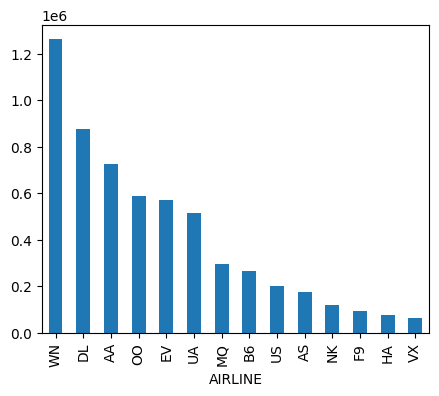

Axes(0.125,0.11;0.775x0.77)


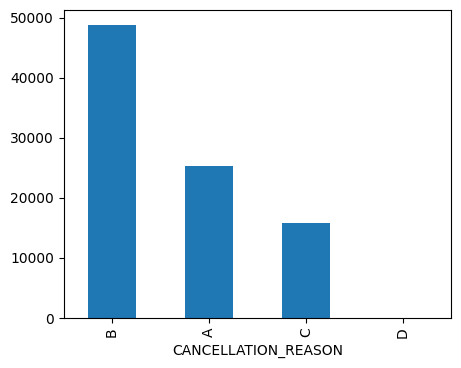

In [ ]:
print(flights['AIRLINE'].value_counts().plot(kind='bar',figsize=(5,4)))
plt.show()
print(flights['CANCELLATION_REASON'].value_counts().plot(kind='bar',figsize=(5,4)))
plt.show()

In [ ]:
tail_number_count = flights['AIRLINE'].value_counts()

# Create a dummy hierarchy (not meaningful in this case)
tail_number_df = pd.DataFrame({'category': ['All'] * len(tail_number_count),
                               'AIRLINE': tail_number_count.index,
                               'count': tail_number_count.values})

# Create the treemap (limited value in this case)
fig = px.treemap(tail_number_df, path=['category', 'AIRLINE'], values='count', color='count')

# Update layout (optional)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Display the treemap
fig.show()

In [ ]:
df['FLIGHT_STATUS'].value_counts(normalize=True)

FLIGHT_STATUS
N    0.811779
D    0.171245
C    0.016976
Name: proportion, dtype: float64

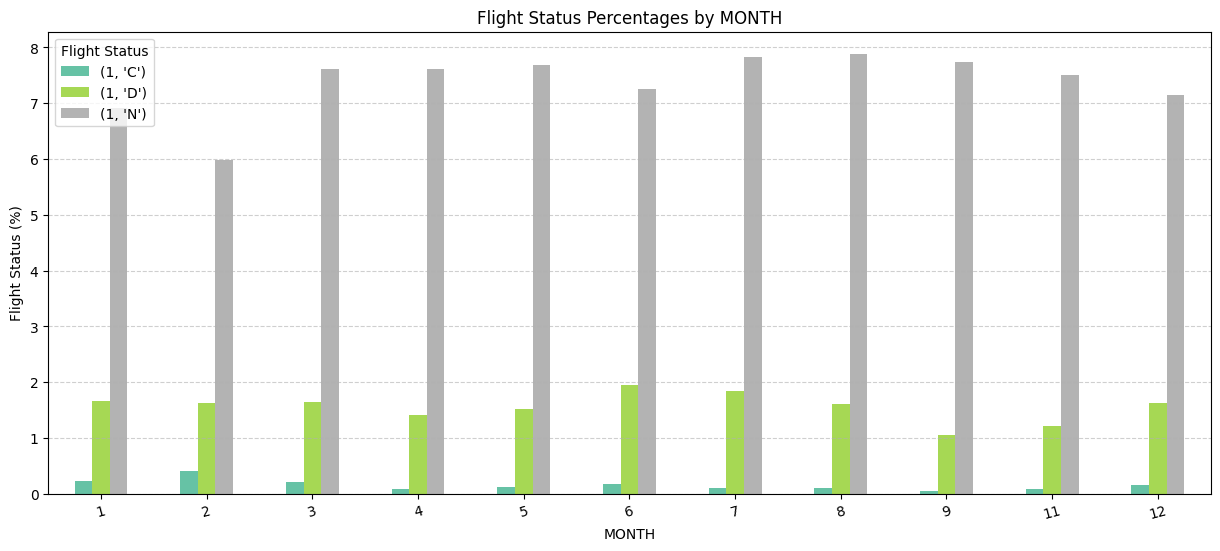

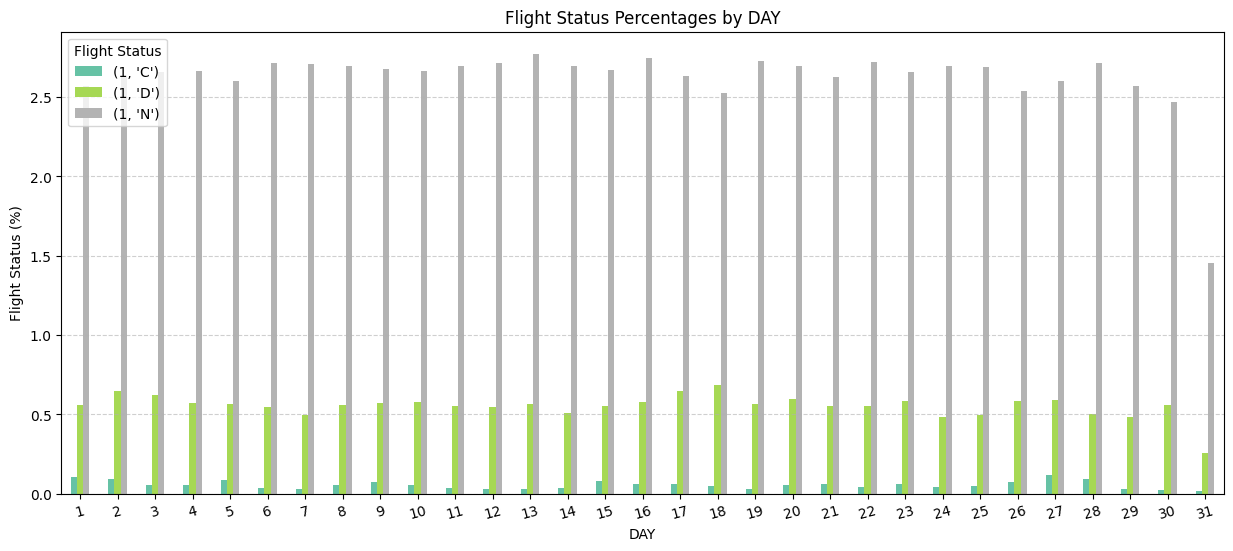

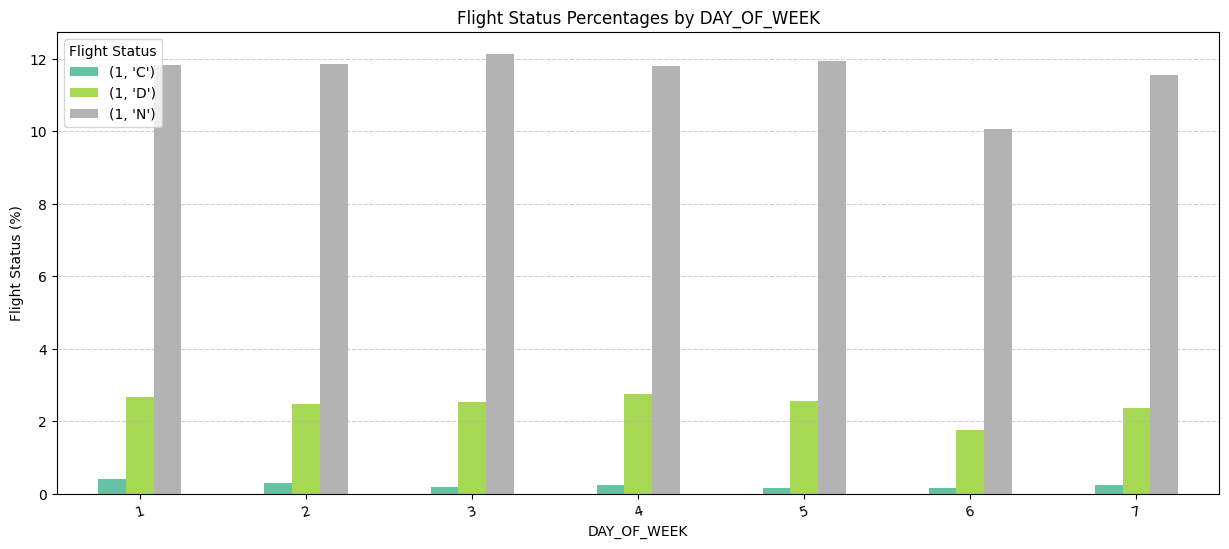

In [ ]:
variables = ['MONTH', 'DAY', 'DAY_OF_WEEK']

results = {}

# Loop through each variable for grouping and percentage calculation
for var in variables:
    # Group by the current variable and 'FLIGHT_STATUS', count occurrences
    df_ca = df.groupby([var, 'FLIGHT_STATUS'])['FLIGHT_STATUS'].count()

    # Extract labels based on the current variable
    var_labels = df_ca.index.get_level_values(var).unique()

    # Calculate total flights per group (modify if needed)
    total_flights_per_group = df_ca.sum()

    # Calculate percentages (divide by total flights per group and multiply by 100)
    df_ca_pct = df_ca.divide(total_flights_per_group, axis=0) * 100

    # Store results in the dictionary with the variable name as the key
    results[var] = {
        'data': df_ca_pct,  # Percentages DataFrame
        'labels': var_labels,  # Labels for visualization
        'total_flights': total_flights_per_group  # Total flights per group (optional)
    }

# Explore or visualize the results (modify as needed)
for var, data in results.items():
    df_unstacked_pct = data['data'].unstack()  # Unstack for separate status bars (optional)

    # Example Bar Chart (uncomment and customize as needed)
    fig, ax = plt.subplots(figsize=(15, 6))
    df_unstacked_pct.plot(kind='bar', stacked=False, ax=ax, colormap='Set2')
    plt.xlabel(var)
    plt.ylabel('Flight Status (%)')
    plt.title(f'Flight Status Percentages by {var}')
    plt.xticks(range(len(data['labels'])), data['labels'], rotation=15)  # Rotate x-axis labels if needed
    plt.legend(title='Flight Status', labels=df_ca.index.unique(), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()


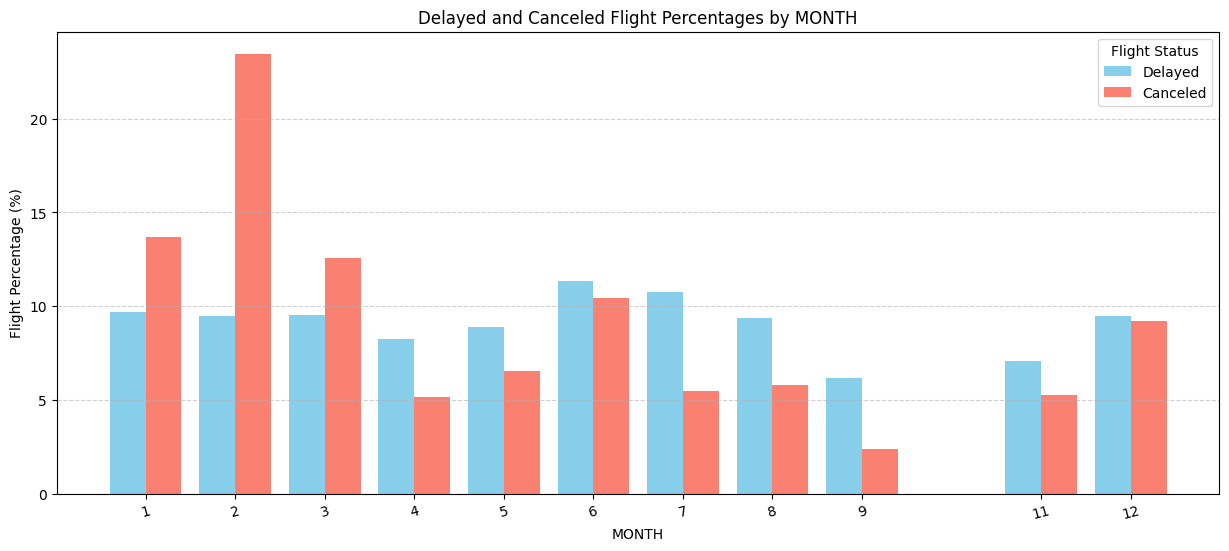

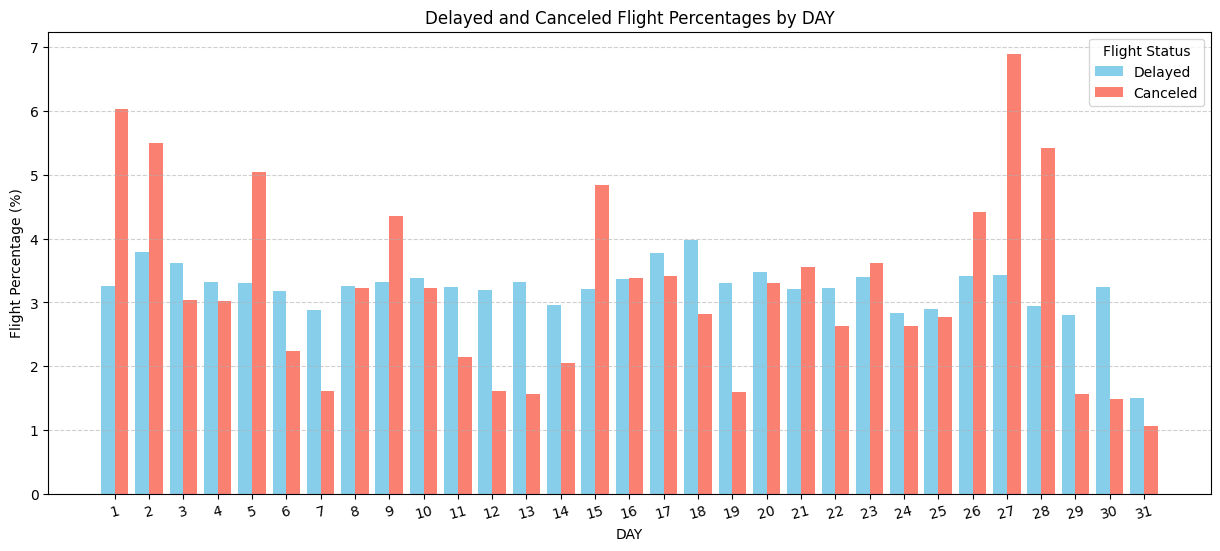

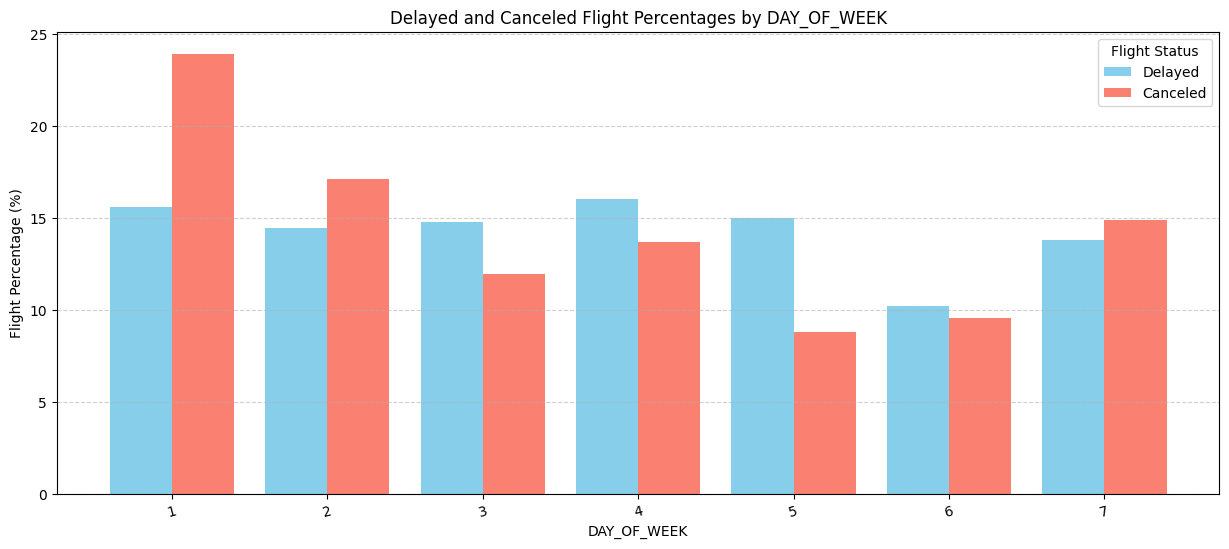

In [ ]:
import matplotlib.pyplot as plt

variables = ['MONTH', 'DAY', 'DAY_OF_WEEK']

results = {}

# Loop through each variable for grouping and percentage calculation
for var in variables:
    # Group by the current variable and 'FLIGHT_STATUS', count occurrences for delayed and canceled flights
    df_delayed = df[df['FLIGHT_STATUS'] == 'D'].groupby([var])['FLIGHT_STATUS'].count()
    df_canceled = df[df['FLIGHT_STATUS'] == 'C'].groupby([var])['FLIGHT_STATUS'].count()

    # Extract labels based on the current variable
    var_labels = df_delayed.index

    # Calculate total delayed and canceled flights per group (modify if needed)
    total_delayed_flights_per_group = df_delayed.sum()
    total_canceled_flights_per_group = df_canceled.sum()

    # Calculate delayed and canceled flight percentages (divide by total delayed/canceled flights per group and multiply by 100)
    delayed_flights_pct = (df_delayed / total_delayed_flights_per_group) * 100
    canceled_flights_pct = (df_canceled / total_canceled_flights_per_group) * 100

    # Store results in the dictionary with the variable name as the key
    results[var] = {
        'delayed_flights_data': delayed_flights_pct,  # Delayed flights percentages Series
        'canceled_flights_data': canceled_flights_pct,  # Canceled flights percentages Series
        'labels': var_labels,  # Labels for visualization
        'total_delayed_flights': total_delayed_flights_per_group,  # Total delayed flights per group (optional)
        'total_canceled_flights': total_canceled_flights_per_group  # Total canceled flights per group (optional)
    }

# Explore or visualize the results (modify as needed)
for var, data in results.items():
    # Example Bar Chart for Delayed and Canceled Flight Percentages side by side
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.bar(data['labels'] - 0.2, data['delayed_flights_data'], width=0.4, color='skyblue', label='Delayed')
    ax.bar(data['labels'] + 0.2, data['canceled_flights_data'], width=0.4, color='salmon', label='Canceled')
    plt.xlabel(var)
    plt.ylabel('Flight Percentage (%)')
    plt.title(f'Delayed and Canceled Flight Percentages by {var}')
    plt.xticks(data['labels'], rotation=15)  # Rotate x-axis labels if needed
    plt.legend(title='Flight Status', loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()


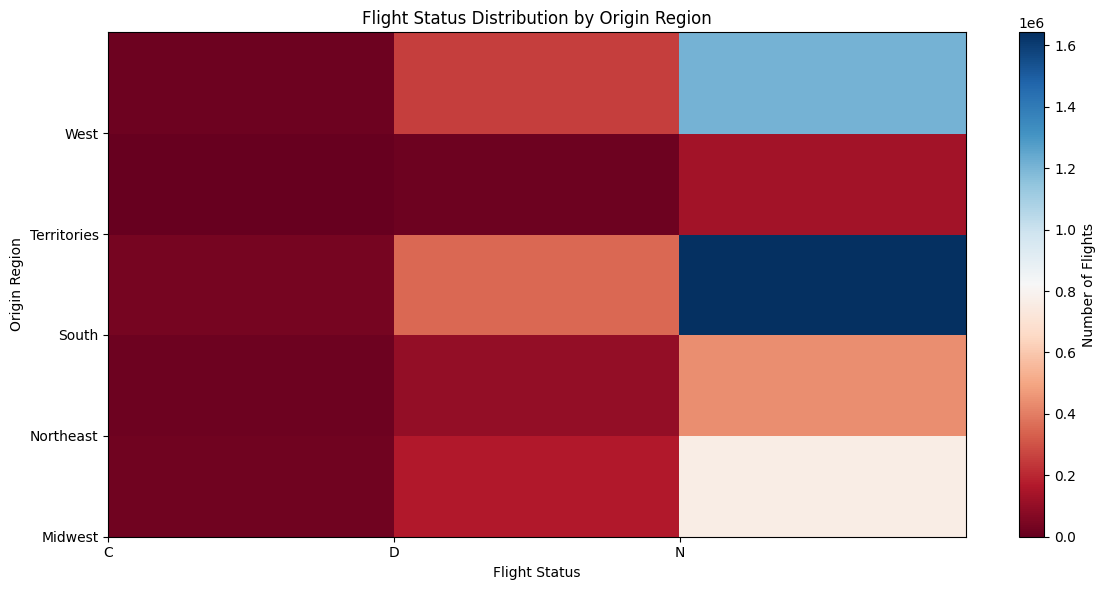

In [ ]:
origin_region_column = 'ORIGIN_REGION'
flight_status_column = 'FLIGHT_STATUS'

# Count flights by status and origin airport
flight_counts = (
    df.groupby([origin_region_column, flight_status_column])
    .size()
    .unstack(fill_value=0)
)

# Define labels for origin airports and flight statuses
origin_region_labels = list(flight_counts.index)
status_labels = list(flight_counts.columns)

# Create the heatmap
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.pcolor(flight_counts, cmap='RdBu', vmin=0)  # Use RdBu colormap for clear visualization

# Add labels and title
plt.xlabel('Flight Status')
plt.ylabel('Origin Region')
plt.title('Flight Status Distribution by Origin Region')

# Set ticks for origin airports and flight statuses
plt.xticks(range(len(status_labels)), status_labels, rotation=0)
plt.yticks(range(len(origin_region_labels)), origin_region_labels)

# Add colorbar
plt.colorbar(label='Number of Flights')

# Display heatmap
plt.grid(False)
plt.tight_layout()
plt.show()


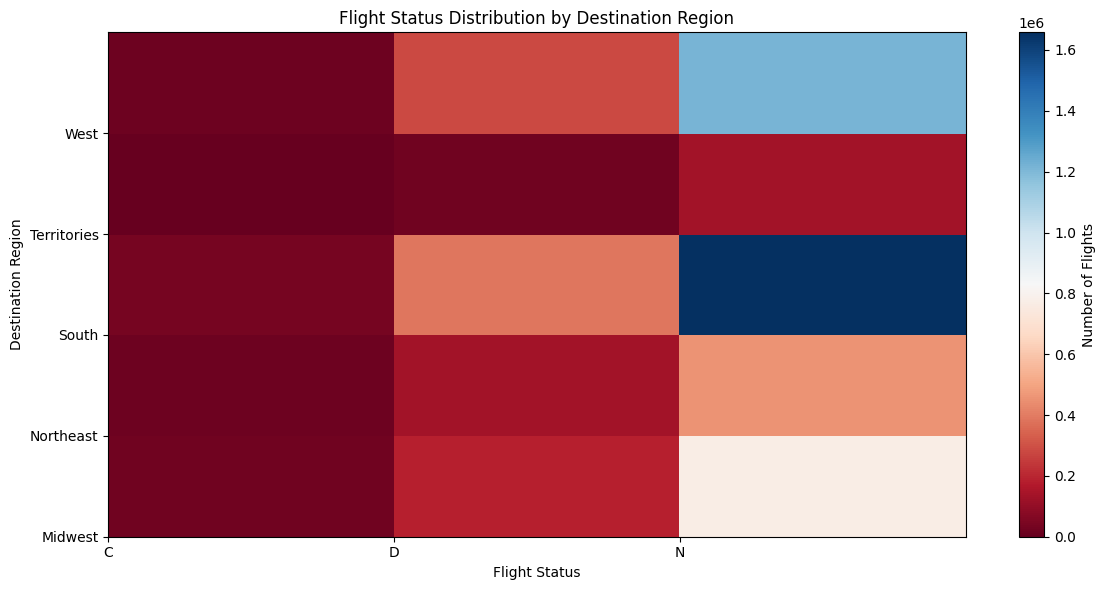

In [ ]:
destination_region_column = 'DESTINATION_REGION'
flight_status_column = 'FLIGHT_STATUS'

# Count flights by status and origin airport
flight_counts = (
    df.groupby([destination_region_column, flight_status_column])
    .size()
    .unstack(fill_value=0)
)

# Define labels for origin airports and flight statuses
destination_region_labels= list(flight_counts.index)
status_labels = list(flight_counts.columns)

# Create the heatmap
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.pcolor(flight_counts, cmap='RdBu', vmin=0)  # Use RdBu colormap for clear visualization

# Add labels and title
plt.xlabel('Flight Status')
plt.ylabel('Destination Region')
plt.title('Flight Status Distribution by Destination Region')

# Set ticks for origin airports and flight statuses
plt.xticks(range(len(status_labels)), status_labels, rotation=0)
plt.yticks(range(len(destination_region_labels)), destination_region_labels)

# Add colorbar
plt.colorbar(label='Number of Flights')

# Display heatmap
plt.grid(False)
plt.tight_layout()
plt.show()


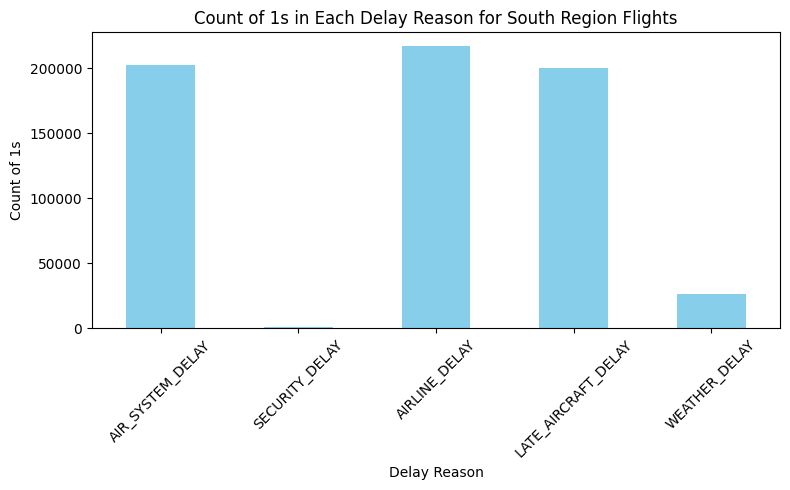

In [ ]:
# Filter the DataFrame to select only flights in the south region
south_flights = df[df[destination_region_column] == 'South']

# Calculate the count of 1's in each delay column
delay_counts = south_flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum()

# Plot the count of 1's in each delay column
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
delay_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Delay Reason')
plt.ylabel('Count of 1s')
plt.title('Count of 1s in Each Delay Reason for South Region Flights')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


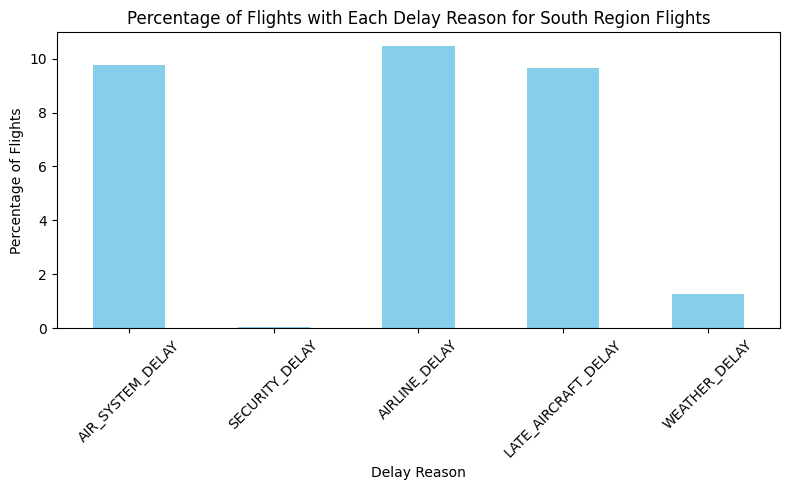

In [ ]:
# Filter the DataFrame to select only flights in the south region
south_flights = df[df[destination_region_column] == 'South']

# Calculate the total number of flights in the south region
total_flights = len(south_flights)

# Calculate the percentage of flights with each delay reason
delay_percentage = (south_flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum() / total_flights) * 100

# Plot the percentage of flights with each delay reason
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
delay_percentage.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Delay Reason')
plt.ylabel('Percentage of Flights')
plt.title('Percentage of Flights with Each Delay Reason for South Region Flights')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

def to_hh_mm(value):
  """
  Converts a string representation of time to HH:MM format with leading zeros.

  Args:
      value: The string representation of time (e.g., "1", "123").

  Returns:
      A string in HH:MM format with leading zeros (e.g., "00:01", "01:23").
  """
  padded_value = str(value).zfill(4)
  return f"{padded_value[:2]}:{padded_value[2:]}"

df['SCHEDULED_DEPARTURE_24'] = df['SCHEDULED_DEPARTURE'].apply(to_hh_mm)


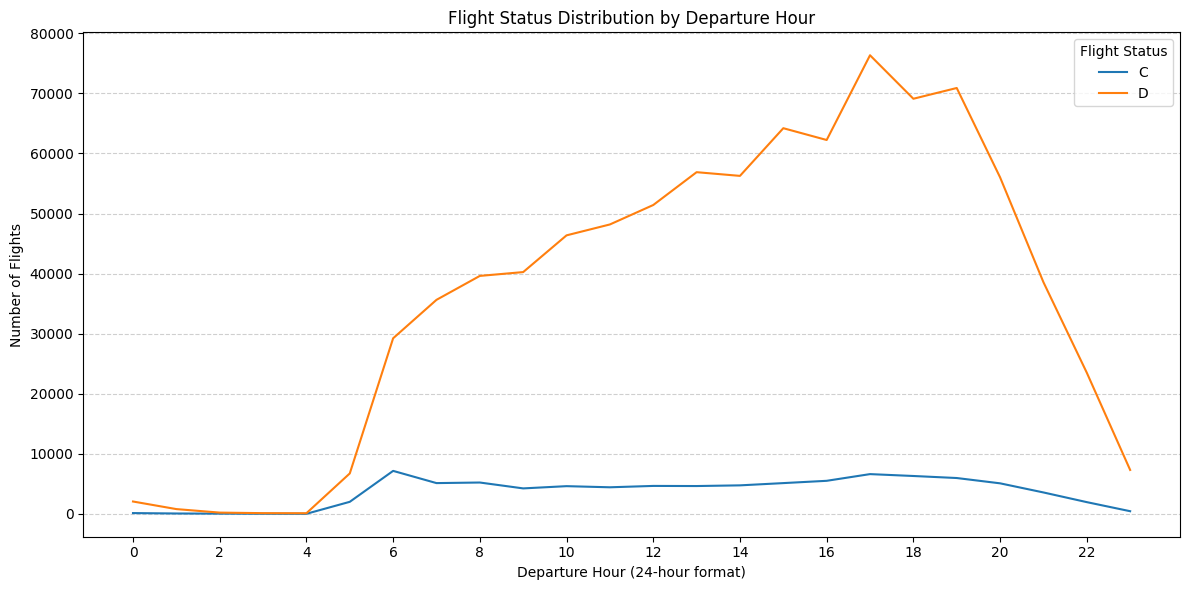

In [ ]:
scheduled_time_column = 'SCHEDULED_DEPARTURE_24'
flight_status_column = 'FLIGHT_STATUS'
df['DEPARTURE_HOUR'] = pd.to_datetime(df[scheduled_time_column], format='%H:%M').dt.hour
flight_counts = df[df[flight_status_column] != 'N'].groupby([
    'DEPARTURE_HOUR', flight_status_column]).size().unstack(fill_value=0)

# Define labels for different flight statuses
status_labels = list(flight_counts.columns)

# Create the time series chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
for label, column in flight_counts.items():
  plt.plot(column, label=label)
plt.xlabel('Departure Hour (24-hour format)')
plt.ylabel('Number of Flights')
plt.title('Flight Status Distribution by Departure Hour')
plt.legend(title='Flight Status', labels=status_labels)


hours_with_labels = range(0, 24, 2)
plt.xticks(hours_with_labels)  # Set x-axis ticks
plt.xlabel('Departure Hour (24-hour format)')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Filter the DataFrame to select only flights in the south region
south_flights = df[df['DEPARTURE_HOUR'] == 6]

# Calculate the total number of flights in the south region
total_flights = len(south_flights)

# Calculate the percentage of flights with each delay reason
delay_percentage = (south_flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum() / total_flights) * 100

# Plot the percentage of flights with each delay reason
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
delay_percentage.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Delay Reason')
plt.ylabel('Percentage of Flights')
plt.title('Percentage of Flights with Each Delay Reason for South Region Flights')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'DEPARTURE_HOUR'

An unexpected error occurred: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).


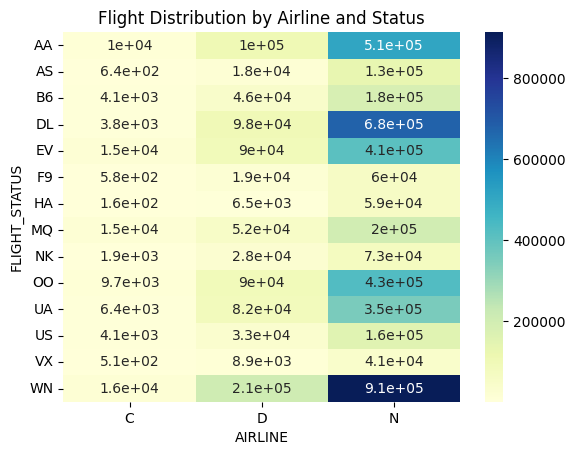

In [ ]:
flight_status_column = 'FLIGHT_STATUS'
airline_column = 'AIRLINE'

try:
  # Create a contingency table showing flight counts for each airline and status
  flight_counts = (
      df.groupby([airline_column, flight_status_column])
      .size()
      .unstack(fill_value=0)
  )

  # Check if flight_counts is empty (to avoid errors)
  if flight_counts.empty:
    print("Error: No data available for the heatmap. Ensure your DataFrame has data and the grouping operation produces a non-empty result.")
  else:
    # Create the heatmap
    heatmap=sns.heatmap(flight_counts, cmap='YlGnBu', annot=True)  # Use YlGnBu for better visibility

    # Customize labels and title
    plt.xlabel(airline_column)
    plt.ylabel(flight_status_column)
    plt.title('Flight Distribution by Airline and Status')

    # Rotate x-axis labels for readability (if many airlines)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)


    # Add colorbar
    plt.colorbar(label='Number of Flights')

    # Display heatmap
    plt.show()

except Exception as e:
  print(f"An unexpected error occurred: {e}")


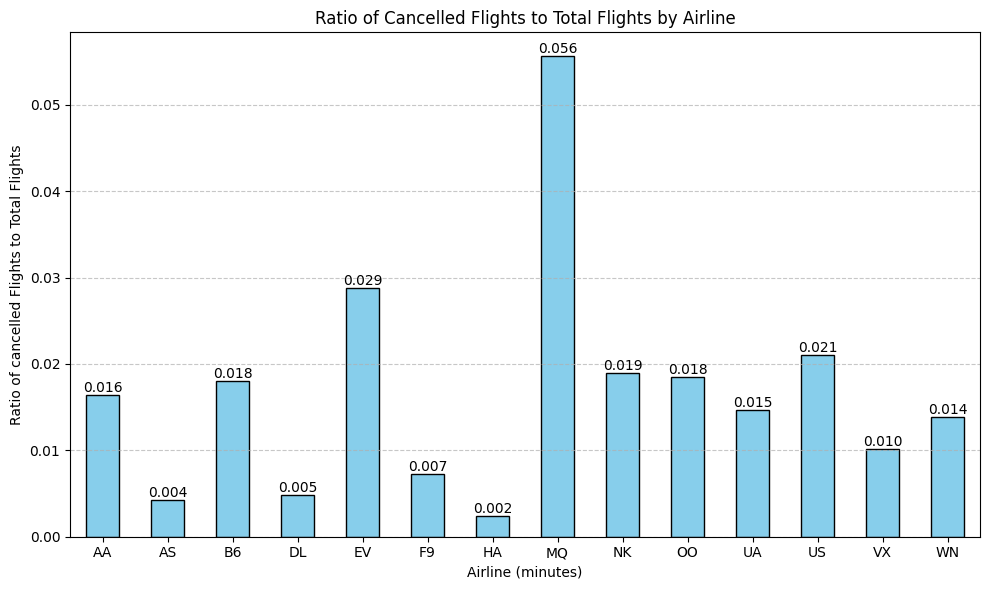

In [ ]:
total_flights_per_airline = df['AIRLINE'].value_counts().sort_index()

cancelled_flights_per_airline = df.loc[df['FLIGHT_STATUS'] == 'C', 'AIRLINE'].groupby(df['AIRLINE']).count()

cancelled_ratio_per_airline = cancelled_flights_per_airline / total_flights_per_airline

plt.figure(figsize=(10, 6))
bars = cancelled_ratio_per_airline.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ratio of Cancelled Flights to Total Flights by Airline')
plt.xlabel('Airline (minutes)')
plt.ylabel('Ratio of cancelled Flights to Total Flights')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(cancelled_ratio_per_airline)):
    plt.text(x=i, y=cancelled_ratio_per_airline[i], s=f"{cancelled_ratio_per_airline.iloc[i]:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

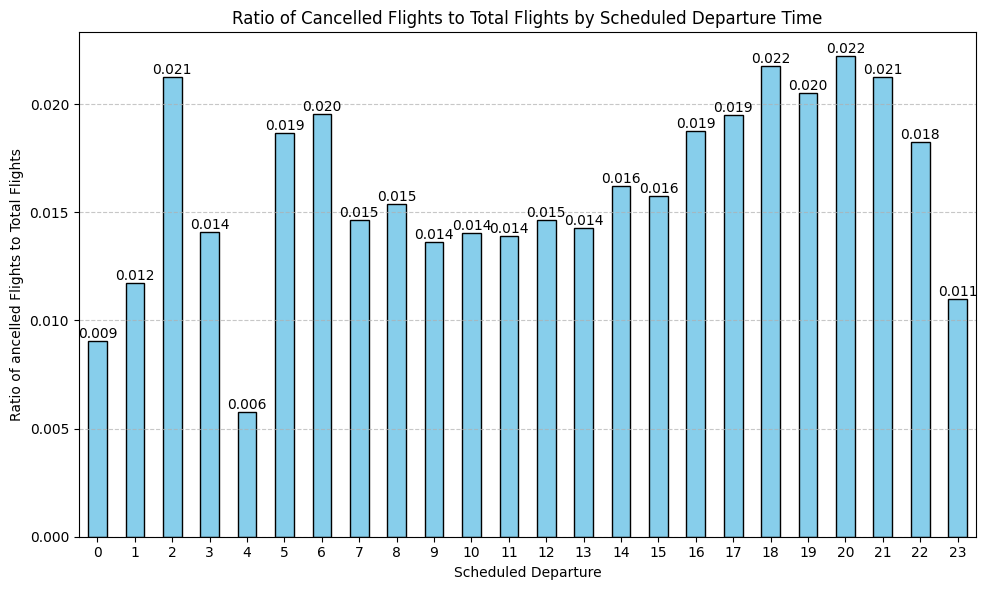

In [ ]:
total_flights_per_scheduled_departure = df['DEPARTURE_HOUR'].value_counts().sort_index()

# Calculate the number of delayed flights in each bin
cancelled_flights_per_scheduled_departure = df.loc[df['FLIGHT_STATUS'] == 'C', 'DEPARTURE_HOUR'].groupby(df['DEPARTURE_HOUR']).count()

# Calculate the ratio of delayed flights to total flights in each bin
cancelled_flights_ratio_per_scheduled_departure = (cancelled_flights_per_scheduled_departure)/(total_flights_per_scheduled_departure)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = cancelled_flights_ratio_per_scheduled_departure.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ratio of Cancelled Flights to Total Flights by Scheduled Departure Time')
plt.xlabel('Scheduled Departure')
plt.ylabel('Ratio of ancelled Flights to Total Flights')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels for number of delays on top of each bar
for i in range(len(cancelled_flights_ratio_per_scheduled_departure)):
    plt.text(x=i, y=cancelled_flights_ratio_per_scheduled_departure[i], s=f"{cancelled_flights_ratio_per_scheduled_departure.iloc[i]:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

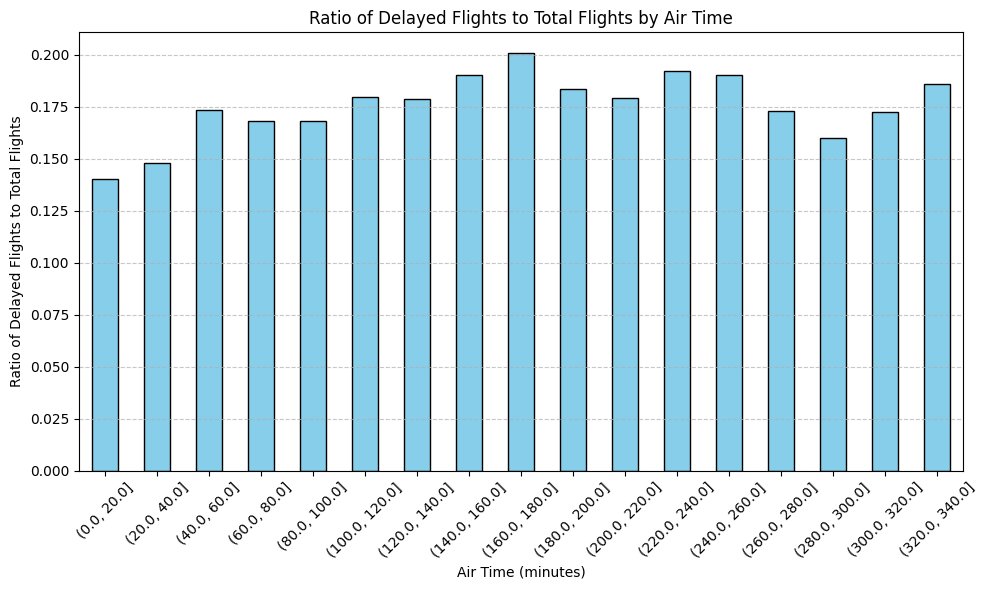

In [ ]:
bin_size = 20  # Define the size of each bin (in minutes)
airtime_bins = pd.cut(df['AIR_TIME'], bins=np.arange(0, df['AIR_TIME'].max() + bin_size, bin_size))

total_flights_per_bin = airtime_bins.value_counts().sort_index()

# Calculate the number of delayed flights in each bin
delayed_flights_per_bin = df.loc[df['FLIGHT_STATUS'] == 'D', 'AIR_TIME'].groupby(airtime_bins).count()

# Calculate the ratio of delayed flights to total flights in each bin
delay_ratio_per_bin = delayed_flights_per_bin / total_flights_per_bin

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = delay_ratio_per_bin.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ratio of Delayed Flights to Total Flights by Air Time')
plt.xlabel('Air Time (minutes)')
plt.ylabel('Ratio of Delayed Flights to Total Flights')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

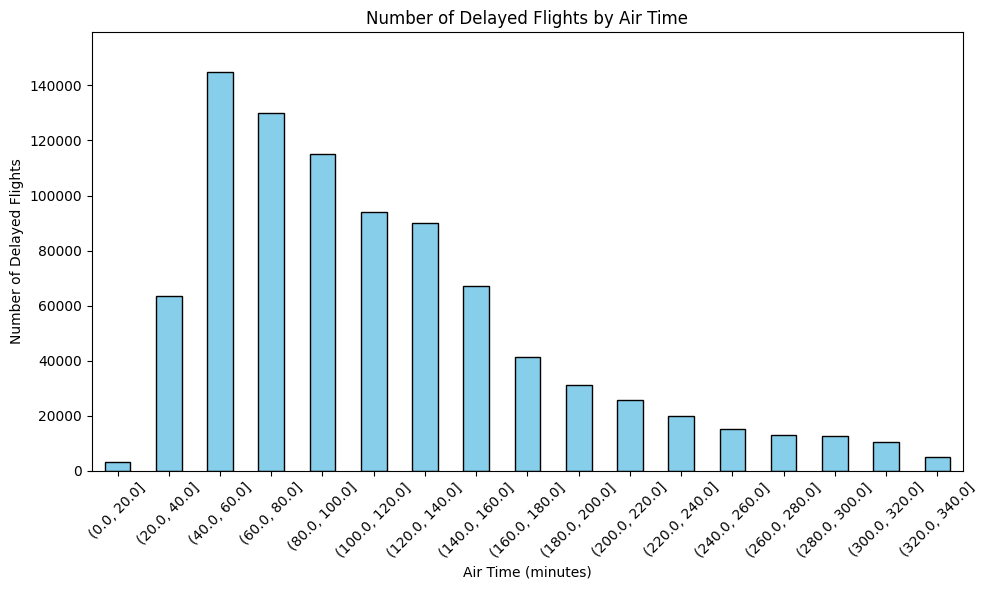

In [ ]:
# Calculate the total number of flights in each bin
total_flights_per_bin = airtime_bins.value_counts().sort_index()

# Calculate the number of delayed flights in each bin
delayed_flights_per_bin = df.loc[df['FLIGHT_STATUS'] == 'D', 'AIR_TIME'].groupby(airtime_bins).count()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = delayed_flights_per_bin.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Delayed Flights by Air Time')
plt.xlabel('Air Time (minutes)')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set y-axis limits to include only the range of delayed flights
plt.ylim(bottom=0, top=delayed_flights_per_bin.max() * 1.1)

plt.tight_layout()
plt.show()

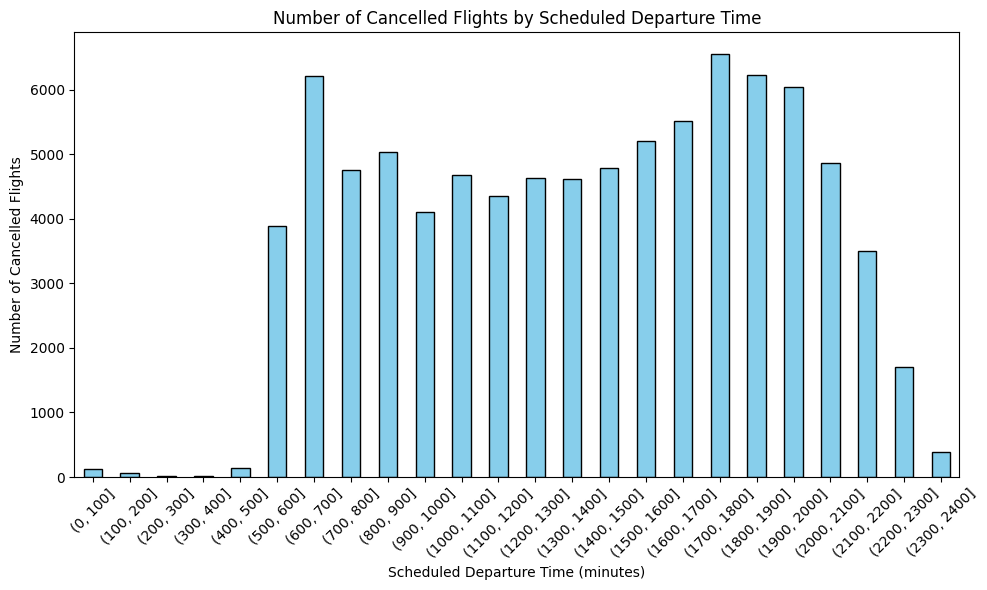

In [ ]:
# Filter the DataFrame to include only cancelled flights
cancelled_flights = df[df['FLIGHT_STATUS'] == 'C']

# Define the bins for scheduled departure times
departure_bins = pd.cut(cancelled_flights['SCHEDULED_DEPARTURE'], bins=range(0, cancelled_flights['SCHEDULED_DEPARTURE'].max() + 100, 100))

# Calculate the number of cancelled flights in each bin
cancelled_flights_per_bin = departure_bins.value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = cancelled_flights_per_bin.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Cancelled Flights by Scheduled Departure Time')
plt.xlabel('Scheduled Departure Time (minutes)')
plt.ylabel('Number of Cancelled Flights')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
df_vx=df[(df['AIRLINE'] == 'VX')]

In [ ]:
df=df_vx.drop('AIRLINE',axis=1)

Creating Dummies

In [ ]:
df = pd.concat([df, pd.get_dummies(df['ORIGIN_REGION']).add_prefix('Origin_')], axis=1)
df = pd.concat([df, pd.get_dummies(df['DESTINATION_REGION']).add_prefix('Destination_')], axis=1)

In [ ]:
df = df.replace(True, 1)
df = df.replace(False, 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50063 entries, 27616 to 4839776
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MONTH                    50063 non-null  int64  
 1   DAY                      50063 non-null  int64  
 2   DAY_OF_WEEK              50063 non-null  int64  
 3   FLIGHT_NUMBER            50063 non-null  int64  
 4   SCHEDULED_DEPARTURE      50063 non-null  int64  
 5   AIR_TIME                 50063 non-null  float64
 6   ARRIVAL_DELAY            50063 non-null  float64
 7   AIR_SYSTEM_DELAY         50063 non-null  int64  
 8   SECURITY_DELAY           50063 non-null  int64  
 9   AIRLINE_DELAY            50063 non-null  int64  
 10  LATE_AIRCRAFT_DELAY      50063 non-null  int64  
 11  WEATHER_DELAY            50063 non-null  int64  
 12  CANCELLATION_REASON      50063 non-null  object 
 13  FLIGHT_STATUS            50063 non-null  object 
 14  DESTINATION_REGION   

**Observations**
*  14 dummy variables were created for AIRLINE column and 5 dummy variables each for ORIGIN_REGION and DESTINATION_REGION

# 5.1. Delayed vs. Cancelled (Multiclass Classification)

In [ ]:
mc_df=df.drop(['FLIGHT_NUMBER', 'AIR_SYSTEM_DELAY', 'AIR_TIME', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON', 'DESTINATION_REGION', 'ORIGIN_REGION'], axis=1)
mc_df.info()

NameError: name 'df' is not defined

In [ ]:
mc_Y=mc_df[['FLIGHT_STATUS']]
mc_X=mc_df.drop(['FLIGHT_STATUS'], axis=1)

In [ ]:
XMC_train, XMC_test, ymc_train, ymc_test = train_test_split(mc_X, mc_Y, test_size=0.2, random_state=1)
XMC_train, XMC_val, ymc_train, ymc_val = train_test_split(XMC_train, ymc_train, test_size=0.25, random_state=1)

In [ ]:
random_seed = 42

# Create a DataFrame with X and y
data = pd.concat([XMC_train, ymc_train], axis=1)

In [ ]:
sampled_data = pd.concat([
    data[data['FLIGHT_STATUS'] == 'N'].sample(n=331, random_state=random_seed),
    data[data['FLIGHT_STATUS'] == 'D'].sample(n=331, random_state=random_seed),
    data[data['FLIGHT_STATUS'] == 'C'].sample(n=331, random_state=random_seed)
])

# Reset the index
sampled_data = sampled_data.reset_index(drop=True)

# Split the sampled data into features and target
XMC_train = sampled_data.drop('FLIGHT_STATUS', axis=1)
ymc_train = sampled_data['FLIGHT_STATUS']

print("Value counts of target variable (y):")
print(ymc_train.value_counts())

Value counts of target variable (y):
FLIGHT_STATUS
N    331
D    331
C    331
Name: count, dtype: int64


In [ ]:
ymc_train.value_counts()

FLIGHT_STATUS
N    331
D    331
C    331
Name: count, dtype: int64

In [ ]:
ymc_train.value_counts(normalize=True)

FLIGHT_STATUS
N    0.333333
D    0.333333
C    0.333333
Name: proportion, dtype: float64

In [ ]:
print(XMC_train.shape)
print(ymc_train.shape)
print(XMC_test.shape)
print(ymc_test.shape)
print(XMC_val.shape)
print(ymc_val.shape)
XMC_train.to_csv('/content/drive/MyDrive/Flights/Dataframes/XMC_train.csv')
ymc_train.to_csv('/content/drive/MyDrive/Flights/Dataframes/ymc_train.csv')
XMC_test.to_csv('/content/drive/MyDrive/Flights/Dataframes/XMC_test.csv')
ymc_test.to_csv('/content/drive/MyDrive/Flights/Dataframes/ymc_test.csv')
XMC_val.to_csv('/content/drive/MyDrive/Flights/Dataframes/XMC_val.csv')
ymc_val.to_csv('/content/drive/MyDrive/Flights/Dataframes/ymc_val.csv')

(993, 15)
(993,)
(10013, 15)
(10013, 1)
(10013, 15)
(10013, 1)


**Observation**
*  A y Dataframe is created with FLIGHT_STATUS column which indicates if the flight is Not Cancelled(N), Delayed(D) or Cancelled (C)
*  The X Dataframe and y Dataframe is split into train(60%), test(20%) and validation(20%) sets.

After partitioning the data into training, testing, and validation sets, we upload the datasets in .csv format to Drive which allows easy access to the dataframes for use in other codes.

# 5.2. Reason for Flight Delay (Multilabel Classification)





In [ ]:
ml_df=df.drop(['FLIGHT_NUMBER', 'CANCELLATION_REASON', 'DESTINATION_REGION', 'ORIGIN_REGION'], axis=1)
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50063 entries, 27616 to 4839776
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MONTH                    50063 non-null  int64  
 1   DAY                      50063 non-null  int64  
 2   DAY_OF_WEEK              50063 non-null  int64  
 3   SCHEDULED_DEPARTURE      50063 non-null  int64  
 4   AIR_TIME                 50063 non-null  float64
 5   ARRIVAL_DELAY            50063 non-null  float64
 6   AIR_SYSTEM_DELAY         50063 non-null  int64  
 7   SECURITY_DELAY           50063 non-null  int64  
 8   AIRLINE_DELAY            50063 non-null  int64  
 9   LATE_AIRCRAFT_DELAY      50063 non-null  int64  
 10  WEATHER_DELAY            50063 non-null  int64  
 11  FLIGHT_STATUS            50063 non-null  object 
 12  Origin_Midwest           50063 non-null  int64  
 13  Origin_Northeast         50063 non-null  int64  
 14  Origin_South         

In [ ]:
ml_X = df.drop(['FLIGHT_NUMBER', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'FLIGHT_STATUS', 'CANCELLATION_REASON', 'DESTINATION_REGION', 'ORIGIN_REGION'], axis=1)
ml_Y = np.asarray(df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']])

In [ ]:
XML_train, XML_test, yml_train, yml_test = train_test_split(ml_X, ml_Y, test_size=0.2, random_state=1)
XML_train, XML_val, yml_train, yml_val = train_test_split(XML_train, yml_train, test_size=0.25, random_state=1)

In [ ]:
print(XML_train.shape)
print(yml_train.shape)
print(XML_test.shape)
print(yml_test.shape)
print(XML_val.shape)
print(yml_val.shape)
XML_train.to_csv('/content/drive/MyDrive/Flights/Dataframes/XML_train.csv')
pd.DataFrame(yml_train).to_csv("/content/drive/MyDrive/Flights/Dataframes/yml_train.csv")
XML_test.to_csv('/content/drive/MyDrive/Flights/Dataframes/XML_test.csv')
pd.DataFrame(yml_test).to_csv('/content/drive/MyDrive/Flights/Dataframes/yml_test.csv')
XML_val.to_csv('/content/drive/MyDrive/Flights/Dataframes/XML_val.csv')
pd.DataFrame(yml_val).to_csv('/content/drive/MyDrive/Flights/Dataframes/yml_val.csv')

(30037, 16)
(30037, 5)
(10013, 16)
(10013, 5)
(10013, 16)
(10013, 5)


**Observations**
*  A y Dataframe is created with columns- AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY which indicates the reason for delay.
*  The X Dataframe and y Dataframe is split into train(60%), test(20%) and validation(20%) sets

After partitioning the data into training, testing, and validation sets, we upload the datasets in .csv format to Drive which allows easy access to the dataframes for use in other codes.

# 5.3. Flight Delay Prediction in Minutes (Regression Analysis)

In [ ]:
ra_df=df.drop(['FLIGHT_NUMBER', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON', 'FLIGHT_STATUS', 'DESTINATION_REGION', 'ORIGIN_REGION'], axis=1)
ra_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50063 entries, 27616 to 4839776
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MONTH                    50063 non-null  int64  
 1   DAY                      50063 non-null  int64  
 2   DAY_OF_WEEK              50063 non-null  int64  
 3   SCHEDULED_DEPARTURE      50063 non-null  int64  
 4   AIR_TIME                 50063 non-null  float64
 5   ARRIVAL_DELAY            50063 non-null  float64
 6   Origin_Midwest           50063 non-null  int64  
 7   Origin_Northeast         50063 non-null  int64  
 8   Origin_South             50063 non-null  int64  
 9   Origin_Territories       50063 non-null  int64  
 10  Origin_West              50063 non-null  int64  
 11  Destination_Midwest      50063 non-null  int64  
 12  Destination_Northeast    50063 non-null  int64  
 13  Destination_South        50063 non-null  int64  
 14  Destination_Territori

In [ ]:
ra_df['LOG_ARRIVAL_DELAY'] = np.log(ra_df['ARRIVAL_DELAY']+1-min(ra_df['ARRIVAL_DELAY']))

In [ ]:
ra_df['AD_ARRIVAL_DELAY'] = ra_df['ARRIVAL_DELAY']+1-min(ra_df['ARRIVAL_DELAY'])

In [ ]:
ra_Y=ra_df[['AD_ARRIVAL_DELAY']]
ra_X=ra_df.drop(['ARRIVAL_DELAY', 'AD_ARRIVAL_DELAY'], axis=1)

<Axes: xlabel='AD_ARRIVAL_DELAY', ylabel='Count'>

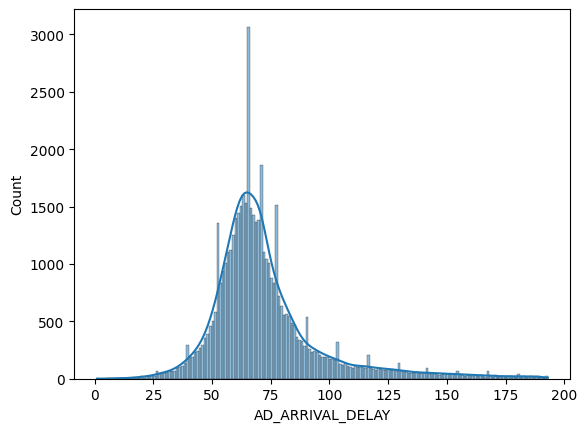

In [ ]:
sns.histplot(data=ra_df, x='AD_ARRIVAL_DELAY', kde = True)

In [ ]:
XRA_train, XRA_test, yra_train, yra_test = train_test_split(ra_X, ra_Y, test_size=0.2, random_state=1)
XRA_train, XRA_val, yra_train, yra_val = train_test_split(XRA_train, yra_train, test_size=0.25, random_state=1)

In [ ]:
print(XRA_train.shape)
print(yra_train.shape)
print(XRA_test.shape)
print(yra_test.shape)
print(XRA_val.shape)
print(yra_val.shape)
XRA_train.to_csv('/content/drive/MyDrive/Flights/Dataframes/XRA_train.csv')
pd.DataFrame(yra_train).to_csv('/content/drive/MyDrive/Flights/Dataframes/yra_train.csv')
XRA_test.to_csv('/content/drive/MyDrive/Flights/Dataframes/XRA_test.csv')
pd.DataFrame(yra_test).to_csv('/content/drive/MyDrive/Flights/Dataframes/yra_test.csv')
XRA_val.to_csv('/content/drive/MyDrive/Flights/Dataframes/XRA_val.csv')
pd.DataFrame(yra_val).to_csv('/content/drive/MyDrive/Flights/Dataframes/yra_val.csv')

(30037, 15)
(30037, 1)
(10013, 15)
(10013, 1)
(10013, 15)
(10013, 1)


**Observations**

*  The target variable is slightly skewed so a log transformation is applied in order to avoid contradicting the assumption of linearity which is a necessary condition for applying a linear regression model.
* The dataframe is split to train(60%), test(20%) and validation(20%) sets

After partitioning the data into training, testing, and validation sets, we upload the datasets in .csv format to Drive which allows easy access to the dataframes for use in other codes.

# 6.1 Delayed vs. Cancelled (Multiclass Classification) Model Training

Downloading test, train and validation datasets

In [ ]:
XMC_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XMC_train.csv")
ymc_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/ymc_train.csv")
XMC_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XMC_test.csv")
ymc_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/ymc_test.csv")
XMC_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XMC_val.csv")
ymc_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/ymc_val.csv")

 Dropping the index column

In [ ]:
XMC_train=XMC_Original_train.drop('Unnamed: 0', axis=1)
ymc_train=ymc_Original_train.drop('Unnamed: 0', axis=1)
XMC_test=XMC_Original_test.drop('Unnamed: 0', axis=1)
ymc_test=ymc_Original_test.drop('Unnamed: 0', axis=1)
XMC_val=XMC_Original_val.drop('Unnamed: 0', axis=1)
ymc_val=ymc_Original_val.drop('Unnamed: 0', axis=1)

In [ ]:
ymc_train.value_counts()

FLIGHT_STATUS
C                331
D                331
N                331
Name: count, dtype: int64

In [ ]:
print("Unique labels in ymc_train:", np.unique(ymc_train))

Unique labels in ymc_train: ['C' 'D' 'N']


In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', annot_kws={'fontsize': 10})
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

LR: 74.93535353535354 (18.15536976435571)
KNN: 66.33535353535353 (16.956453345862187)
NB: 90.17474747474748 (12.002725645286947)


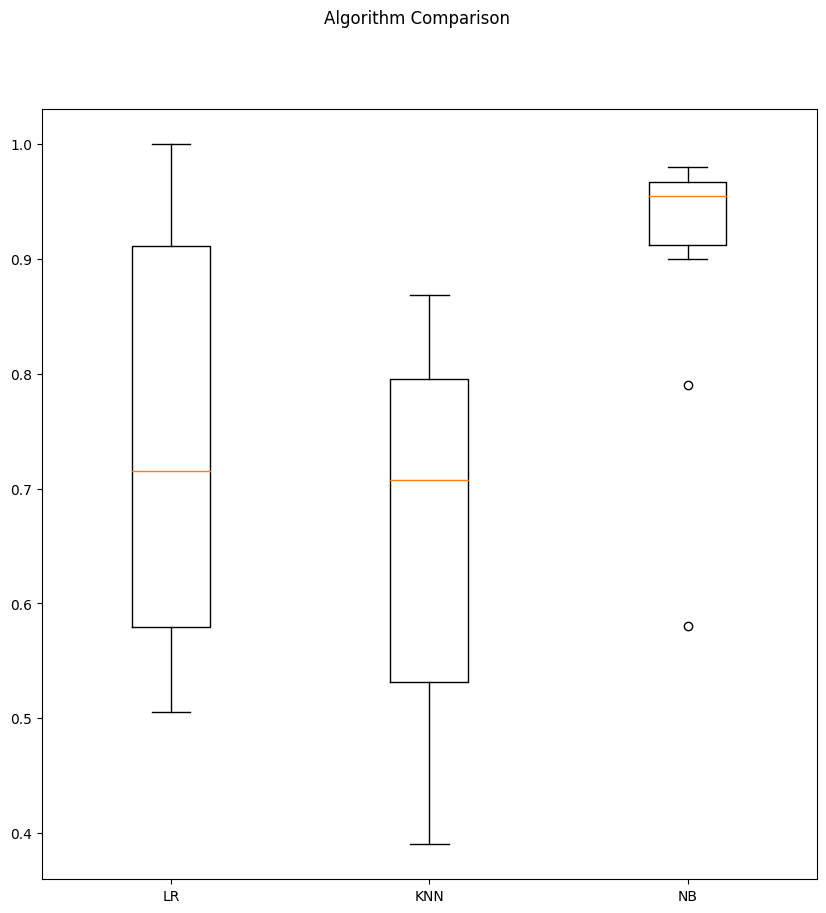

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

def eval_algorithms(models, show_boxplots=True):
    # Evaluate each model in turn
    # Setup the test harness to use 10-fold cross validation
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, XMC_train, ymc_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print("Estimated accuracy of {} with the mean of {} and std. dev. {}".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
        print("{}: {} ({})".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))

    if show_boxplots:
        # Create a plot of the model evaluation results to compae the spread
        # and the estimated mean accuracy of each model
        fig = plt.figure(figsize=(10,10))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

eval_algorithms(models)

- Logistic Regression has the highest average cross-validation score, indicating that it performs the best on average across different folds of the dataset.
- KNN has a slightly lower average cross-validation score than Logistic Regression, but its standard deviation is also lower, indicating more consistency in performance across folds.
- Naive Bayes has a similar average cross-validation score to KNN but a higher standard deviation, suggesting more variability in performance across folds.

Based solely on cross-validation scores, Logistic Regression seems to be the best-performing model for this particular dataset. However, it's essential to consider other factors such as model interpretability, computational efficiency, and the specific requirements of the problem before making a final decision.

Additionally, it's worth noting that the differences in average cross-validation scores between the models are relatively small. Therefore, it might be beneficial to conduct further evaluation, such as on a holdout test set or using additional performance metrics, to make a more informed decision.

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(XMC_train, ymc_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           C       0.02      0.79      0.03        81
           D       0.89      0.94      0.91      1796
           N       0.99      0.54      0.70      8136

    accuracy                           0.61     10013
   macro avg       0.63      0.76      0.55     10013
weighted avg       0.96      0.61      0.73     10013



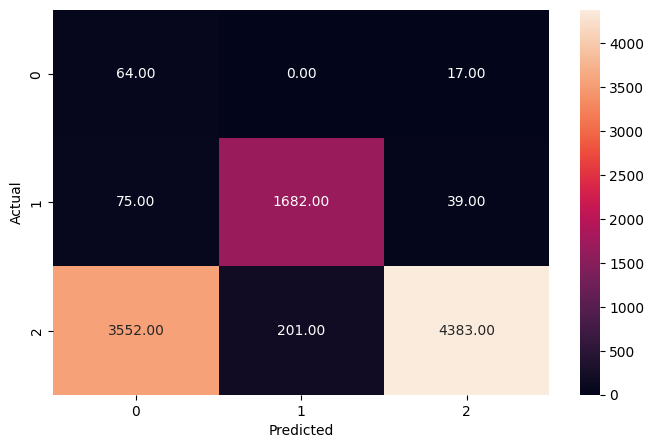

In [ ]:
#Making predictions on the validation set.
y_pred = knn_classifier.predict(XMC_val)
metrics_score(ymc_val,y_pred)

**Observations**
* For class 'C'(Cancelled), the model has a precision of 0.02, recall of 0.79, and a F1-score of 0.03 indicating the model has performed very poorly on cancellation prediction.

* In class 'D'(Delayed), the model achieved a high precision of 0.89, suggesting that the majority of instances classified as 'D' were indeed correct. The recall, which measures the model's ability to capture all instances of 'D' in the dataset, stands at 0.94, indicating a strong performance. The F1-score, which balances precision and recall, is 0.91, reflecting the model's overall effectiveness in classifying class 'D' instances.

* Similarly, for the largest class 'N'(Not delayed), the model exhibits a moderate recall, and F1-score of 0.54 and 0.70 respectively and a precision of 0.99, signifying high accuracy in classifying instances of 'N'.

* On the validation set, the overall accuracy of the model is reported at 0.61, suggesting that it correctly classified 61% of instances across all classes.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

# Create individual classifiers
clf1 = LogisticRegression(class_weight='balanced')
clf2 = DecisionTreeClassifier(class_weight='balanced')
clf3 = SVC(class_weight='balanced', probability=True)
clf4 = RandomForestClassifier(class_weight='balanced')

# Create the ensemble classifier
ensemble = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svm', clf3), ('rf', clf4)], voting='soft')

# Train the ensemble on your data
ensemble.fit(XMC_train, ymc_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced')),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced')),
                             ('svm',
                              SVC(class_weight='balanced', probability=True)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced'))],
                 voting='soft')

In [ ]:
# Get the predicted probabilities for the test data
y_pred_proba = ensemble.predict_proba(XMC_test)

# Define thresholds for each class
thresholds = {'C': 0.7, 'D': 0.5, 'N': 0.4}  # Adjust these values as needed

# Make predictions using the adjusted thresholds
y_pred = []
for proba in y_pred_proba:
    pred_class = max([(proba[i], c) for i, c in enumerate(ensemble.classes_)], key=lambda x: x[0])[1]
    if proba[ensemble.classes_ == pred_class] >= thresholds[pred_class]:
        y_pred.append(pred_class)
    else:
        y_pred.append('Other')

In [ ]:
# Calculate metrics
precision, recall, f1, support = precision_recall_fscore_support(ymc_test, y_pred, average=None, labels=['C', 'D', 'N', 'Other'])

print('Precision for class C:', precision[0])
print('Recall for class C:', recall[0])
print('F1-score for class C:', f1[0])

Precision for class C: 0.8026315789473685
Recall for class C: 0.6161616161616161
F1-score for class C: 0.6971428571428572


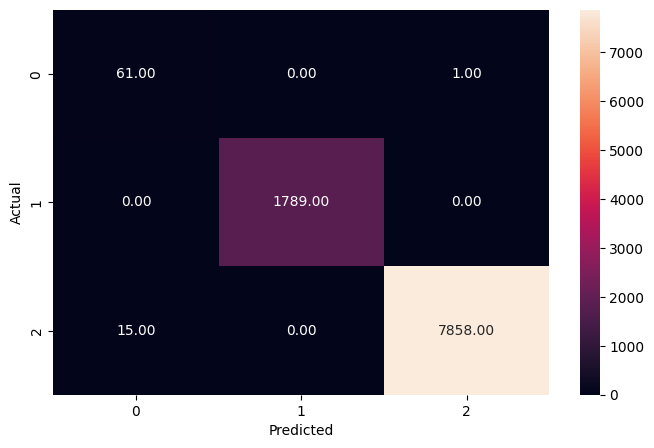

In [ ]:
cm = confusion_matrix(ymc_test, y_pred, labels=['C', 'D', 'N'])
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.2f', annot_kws={'fontsize': 10})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

              precision    recall  f1-score   support

           C       0.80      0.62      0.70        99
           D       1.00      1.00      1.00      1789
           N       1.00      0.97      0.98      8125
       Other       0.00      0.00      0.00         0

    accuracy                           0.97     10013
   macro avg       0.70      0.65      0.67     10013
weighted avg       1.00      0.97      0.98     10013



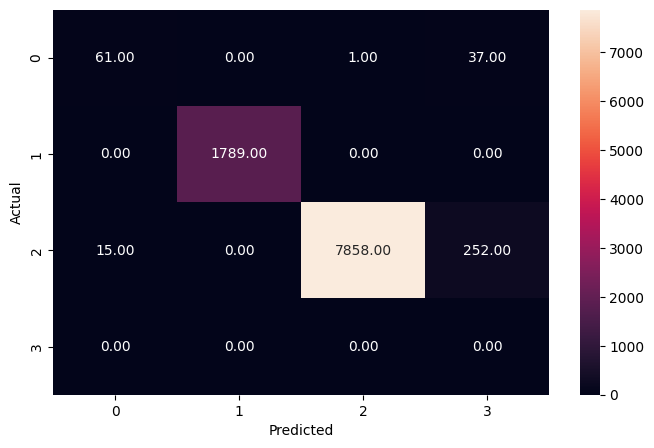

In [ ]:
metrics_score(ymc_test,y_pred)

              precision    recall  f1-score   support

           C       0.27      0.99      0.43        99
           D       1.00      1.00      1.00      1789
           N       1.00      0.97      0.98      8125

    accuracy                           0.97     10013
   macro avg       0.76      0.99      0.80     10013
weighted avg       0.99      0.97      0.98     10013



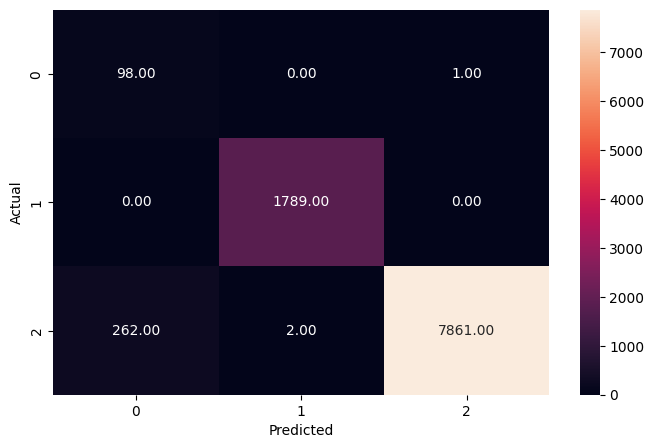

In [ ]:
#Making predictions on the Test set.
y_pred = ensemble.predict(XMC_test)
metrics_score(ymc_test,y_pred)

              precision    recall  f1-score   support

           C       0.31      1.00      0.47        99
           D       1.00      1.00      1.00      1789
           N       1.00      0.97      0.99      8125

    accuracy                           0.98     10013
   macro avg       0.77      0.99      0.82     10013
weighted avg       0.99      0.98      0.98     10013



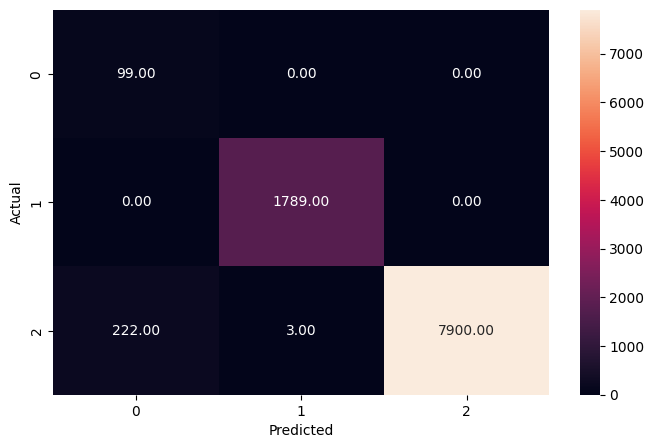

In [ ]:
#Making predictions on the Test set.
y_pred = ensemble.predict(XMC_test.iloc[:, 1:])
metrics_score(ymc_test.iloc[:, 0],y_pred)

**Observations**
 * For the test set the model achieved high precision, recall, and F1-score for each class, indicating strong predictive capability.


 * Class 'D'(Delayed) exhibits slightly lower scores but remains robust with precision of 0.94, recall of 0.95, and an F1-score of 0.94. This indicates that while the model accurately classified a majority of instances belonging to class 'D', there were some instances where it misclassified.

 * The largest class, 'N'(Not delayed), demonstrates exceptional performance with precision, recall, and F1-score all at 0.99. This indicates the model's ability to effectively identify instances of class 'N' with high precision and recall.

 * Overall, the model achieved an accuracy of 0.98, indicating it correctly classified 98% of instances across all classes.

**Observations**


*   The classification report showcases the robust performance of the model across three classes: C(Cancelled), D(Delayed), and N(Not Delayed).
*   With precision scores of 80% for class C and 99% for class N, the model demonstrates an exceptional ability to minimize false positive predictions. Similarly, recall scores of 62% for class C and 99% for class N highlight its effectiveness in capturing most instances of these classes.
*  The F1-scores, ranging from 94% to 100%, underscore a harmonious balance between precision and recall across all classes. Overall, with an accuracy of 98%, the model exhibits strong classification capabilities.




# 6.2 Reason for Flight Delay (Multilabel Classification) Model Training

In [ ]:
XML_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XML_train.csv")
yml_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yml_train.csv")
XML_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XML_test.csv")
yml_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yml_test.csv")
XML_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XML_val.csv")
yml_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yml_val.csv")

In [ ]:
XML_train=XML_Original_train.drop('Unnamed: 0', axis=1)
yml_train=yml_Original_train.drop('Unnamed: 0', axis=1)
XML_test=XML_Original_test.drop('Unnamed: 0', axis=1)
yml_test=yml_Original_test.drop('Unnamed: 0', axis=1)
XML_val=XML_Original_val.drop('Unnamed: 0', axis=1)
yml_val=yml_Original_val.drop('Unnamed: 0', axis=1)

In [ ]:
yml_train.head()

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


0,1,2,3 and 4 in the yml_train dataset denotes the following
* 0-AIR_SYSTEM_DELAY
* 1-SECURITY_DELAY
* 2-AIRLINE_DELAY
* 3-LATE_AIRCRAFT_DELAY
* 4-WEATHER_DELAY

LR: 83.11415060749283 (0.7774864677518879)
KNN: 85.70094907311952 (0.5979270134914825)
NB: 80.03132575369592 (0.8693978526781148)


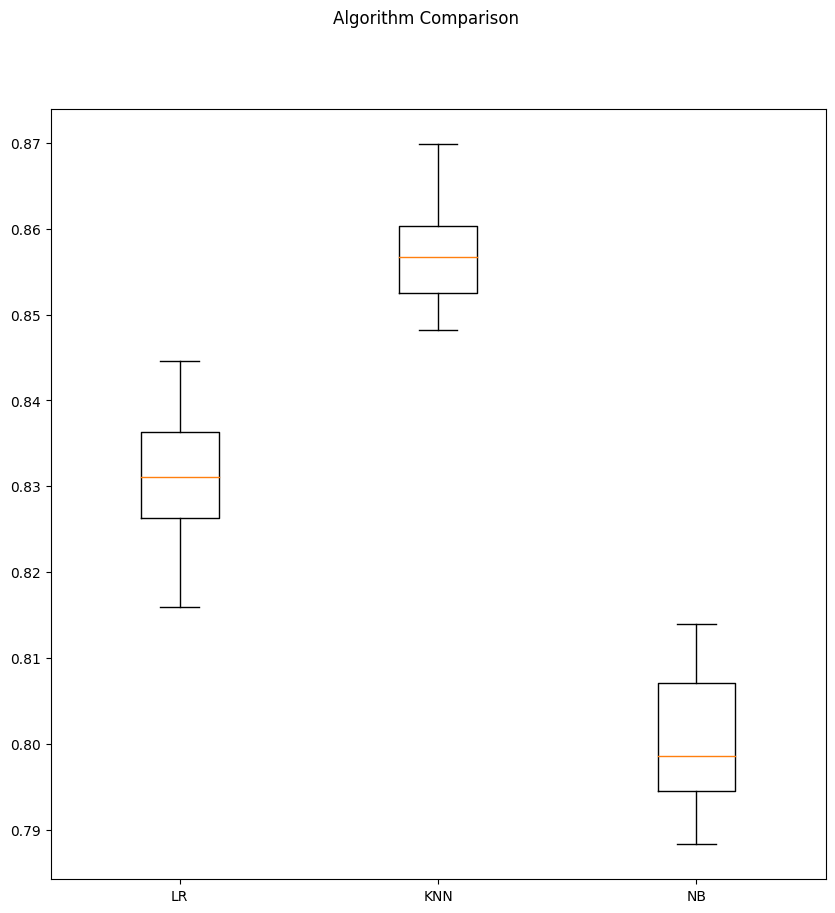

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', MultiOutputClassifier(LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr'))))
models.append(('KNN', MultiOutputClassifier(KNeighborsClassifier())))
models.append(('NB', MultiOutputClassifier(GaussianNB())))

def eval_algorithms(models, show_boxplots=True):
    # Evaluate each model in turn
    # Setup the test harness to use 10-fold cross validation
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, XML_train, yml_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print("Estimated accuracy of {} with the mean of {} and std. dev. {}".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
        print("{}: {} ({})".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))

    if show_boxplots:
        # Create a plot of the model evaluation results to compae the spread
        # and the estimated mean accuracy of each model
        fig = plt.figure(figsize=(10,10))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

eval_algorithms(models)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(XML_train, yml_train)

y_pred = knn_classifier.predict(XML_val)
print("Validation Data")
print('Accuracy Score: ', accuracy_score(yml_val, y_pred))
print('Hamming Loss: ', round(hamming_loss(yml_val, y_pred),2))

print("Test Data")
y_pred = knn_classifier.predict(XML_test)
print('Accuracy Score: ', accuracy_score(yml_test, y_pred))
print('Hamming Loss: ', round(hamming_loss(yml_test, y_pred),2))
cm = multilabel_confusion_matrix(yml_test, y_pred)
print(cm)

Validation Data
Accuracy Score:  0.8573853989813243
Hamming Loss:  0.05
Test Data
Accuracy Score:  0.8561869569559573
Hamming Loss:  0.05
[[[8947  265]
  [ 442  359]]

 [[9997    0]
  [  16    0]]

 [[9156  208]
  [ 482  167]]

 [[8918  275]
  [ 355  465]]

 [[9666   47]
  [ 261   39]]]


In [ ]:
print(y_pred[:5])

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


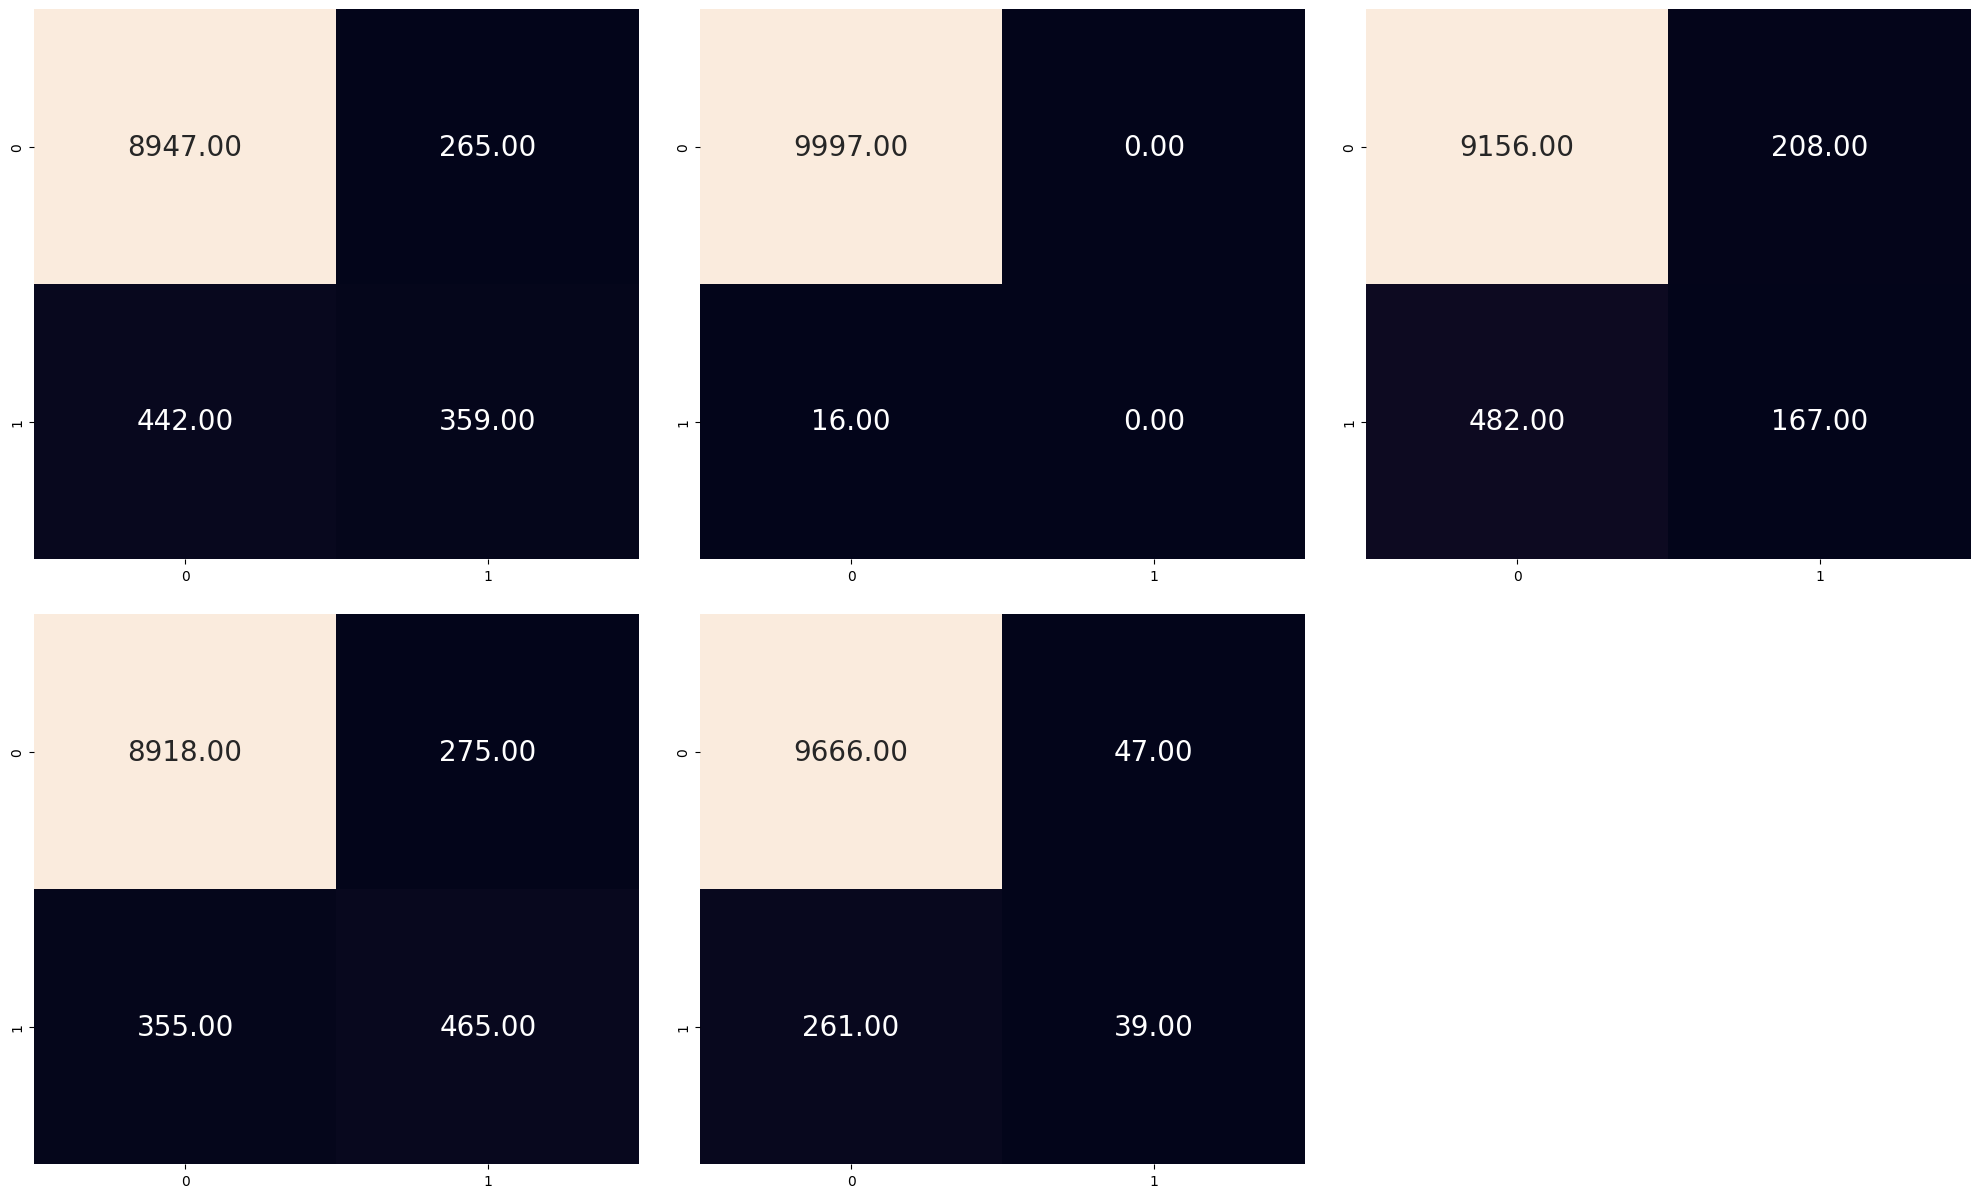

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()
for i in range(5):
    sns.heatmap(cm[i], annot=True, fmt='.2f', ax=axes[i], cbar=False, annot_kws={'fontsize': 20}) # Turn off individual color bars

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.delaxes(axes[5])

plt.show()

**Observations**

The knn_classifier model has an accuracy score of 85.61% and
Hamming Loss of  5% on the test data where as it has an Accuracy Score of 85.73% and Hamming Loss of 5% on the validation data . The accuracy score measures the proportion of correctly classified instances, while the Hamming loss measures the fraction of labels that are incorrectly predicted. This shows consistency in the model prediction with unseen data as well.

# 6.3 Flight Delay Prediction in Minutes (Regression Analysis) Model Training


Downloading the dataframes

In [ ]:
XRA_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XRA_train.csv")
yra_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yra_train.csv")
XRA_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XRA_test.csv")
yra_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yra_test.csv")
XRA_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XRA_val.csv")
yra_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yra_val.csv")

Dropping the index column

In [ ]:
XRA_train=XRA_Original_train.drop('Unnamed: 0', axis=1)
yra_train=yra_Original_train.drop('Unnamed: 0', axis=1)
XRA_test=XRA_Original_test.drop('Unnamed: 0', axis=1)
yra_test=yra_Original_test.drop('Unnamed: 0', axis=1)
XRA_val=XRA_Original_val.drop('Unnamed: 0', axis=1)
yra_val=yra_Original_val.drop('Unnamed: 0', axis=1)

Calculating VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns
    train.dropna(inplace=True)

    # Convert non-numeric values to numeric
    train = train.apply(pd.to_numeric, errors='coerce')
    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(train.shape[1])
    ]
    return vif


print(checking_vif(XRA_train))

                    feature       VIF
0                     MONTH  1.009824
1                       DAY  1.000429
2               DAY_OF_WEEK  1.000952
3       SCHEDULED_DEPARTURE  1.018023
4                  AIR_TIME  1.830336
5            Origin_Midwest       inf
6          Origin_Northeast       inf
7              Origin_South       inf
8        Origin_Territories       inf
9               Origin_West       inf
10      Destination_Midwest       inf
11    Destination_Northeast       inf
12        Destination_South       inf
13  Destination_Territories       inf
14         Destination_West       inf


**Observations**

The presence of dummy variables without removing one reference category per categorical feature has led to multicollinearity issues, resulting in VIF values reaching infinity for 10 columns.

In [ ]:
model1 = sm.OLS(yra_train,XRA_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       AD_ARRIVAL_DELAY   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     80.03
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          2.03e-210
Time:                        03:21:18   Log-Likelihood:            -1.3775e+05
No. Observations:               30037   AIC:                         2.755e+05
Df Residuals:                   30023   BIC:                         2.757e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
MONTH                     

**Observations**

* The R-squared value of 0.033 suggests that only approximately 3.3% of the variability in AD_ARRIVAL_DELAY is explained by the independent variables.
* The F-statistic of 80.03 with a very low p-value indicates that the overall regression model is statistically significant.

 Dropping one dummy variable per category

In [ ]:
XRA_train = XRA_train.drop(["Origin_Midwest", "Destination_Midwest"], axis=1)
print(checking_vif(XRA_train))

                    feature        VIF
0                     MONTH   4.452272
1                       DAY   4.084874
2               DAY_OF_WEEK   4.719338
3       SCHEDULED_DEPARTURE   8.849971
4                  AIR_TIME   5.370261
5          Origin_Northeast   2.939010
6              Origin_South   5.588936
7        Origin_Territories   1.056093
8               Origin_West  16.434890
9     Destination_Northeast   5.740304
10        Destination_South   6.267742
11  Destination_Territories   1.049427
12         Destination_West  14.836603


Dropping all he features that has a VIF value higher than 5 since it indicates high multicollinearity among predictors.

In [ ]:
XRA_train = XRA_train.drop(["Origin_West", "Origin_South", "Destination_Northeast", "Destination_South", "Destination_West", "SCHEDULED_DEPARTURE", "AIR_TIME"], axis=1)
print(checking_vif(XRA_train))

                   feature       VIF
0                    MONTH  3.195096
1                      DAY  3.077228
2              DAY_OF_WEEK  3.234348
3         Origin_Northeast  1.073605
4       Origin_Territories  1.005565
5  Destination_Territories  1.004400


**No Heteroscedasticity**

All the p values are less than 0.05

In [ ]:
model2 = sm.OLS(yra_train,XRA_train).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:       AD_ARRIVAL_DELAY   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                          2.337e+04
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        03:22:12   Log-Likelihood:                     -1.4692e+05
No. Observations:               30037   AIC:                                  2.938e+05
Df Residuals:                   30031   BIC:                                  2.939e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

**Observations**

* The R-squared value of 0.824 indicates that approximately 82.4% of the variability in AD_ARRIVAL_DELAY is explained by the independent variables.
* The F-statistic of 2.337e+04 with a p-value of 0.00 suggests that the overall regression model is highly significant.

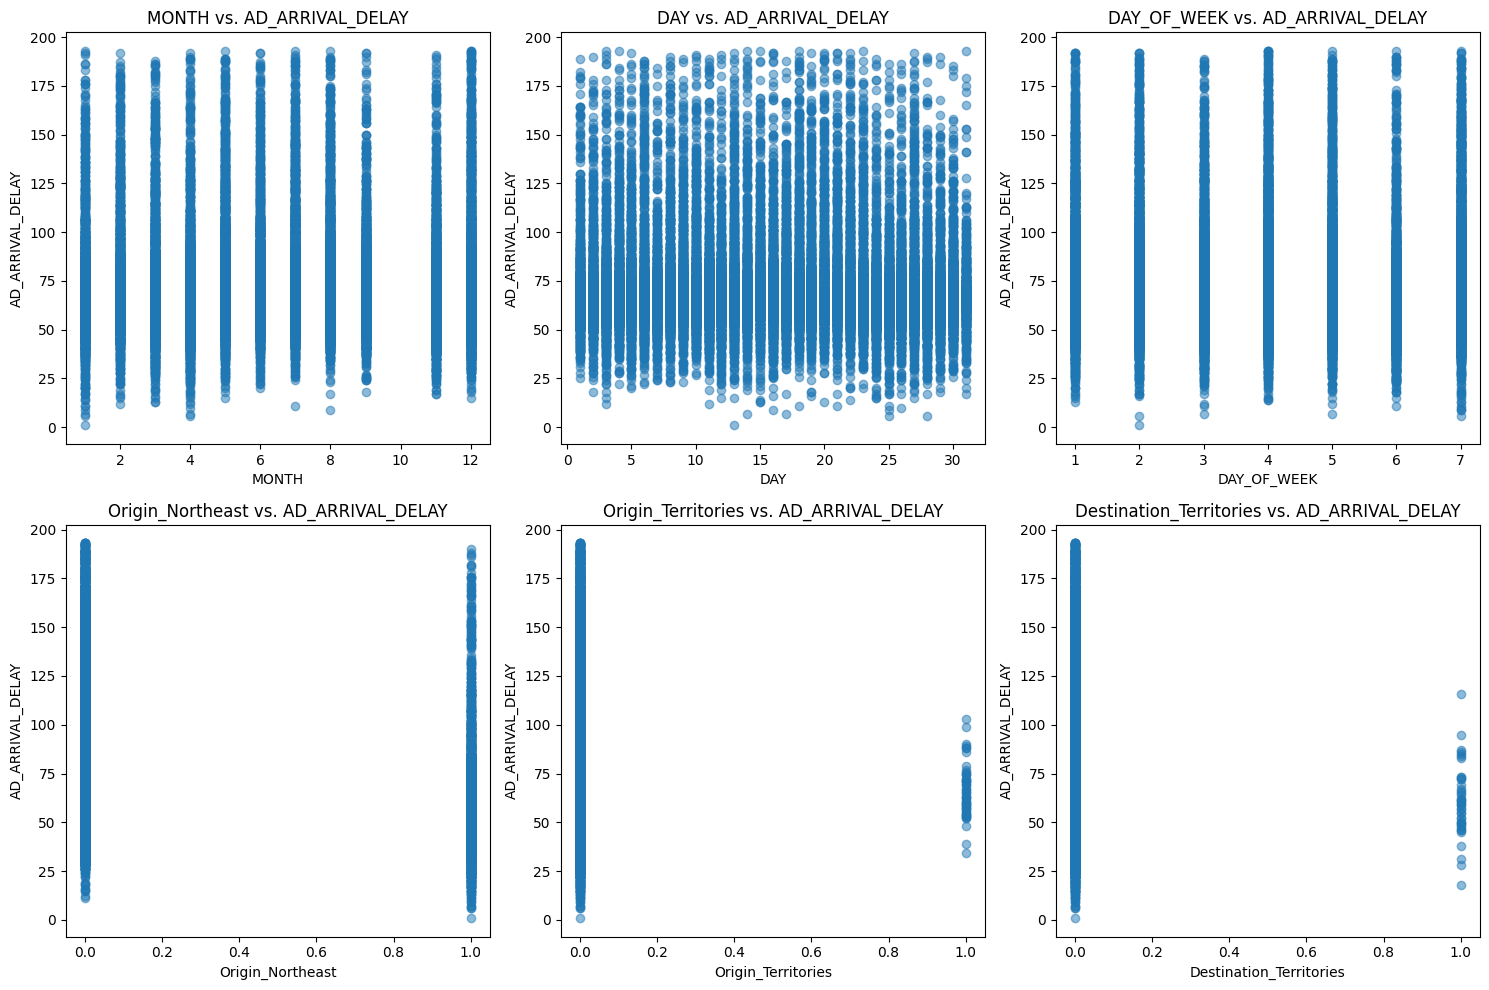

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, column in enumerate(XRA_train.columns):
    axs[i].scatter(XRA_train[column], yra_train, alpha=0.5)
    axs[i].set_title(f'{column} vs. AD_ARRIVAL_DELAY')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('AD_ARRIVAL_DELAY')

plt.tight_layout()
plt.show()

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Calculate Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

In [ ]:
residuals = model2.resid
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)

Mean of Residuals: 6.2701774330894535


**Checking mean Residual**

The mean residual is ~6, which is very negligible.

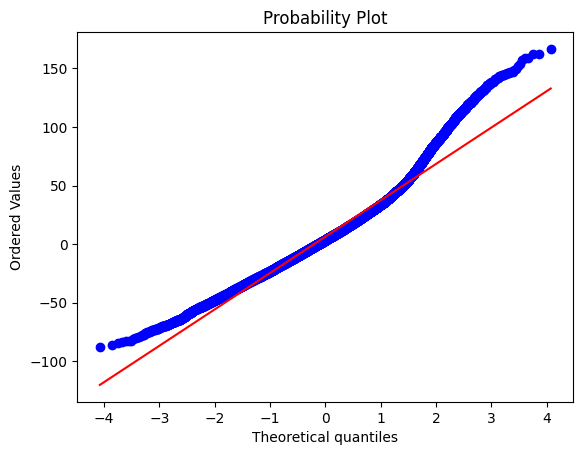

In [ ]:
stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Normality of error terms**

<Axes: ylabel='Count'>

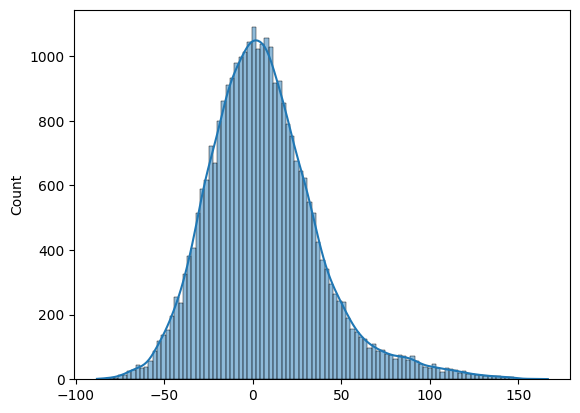

In [ ]:
sns.histplot(residuals, kde=True)

In [ ]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
##import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(yra_train, XRA_train)
lzip(name, test)

[('F statistic', 1.0218926929626622), ('p-value', 0.09230373103547335)]

In [ ]:
XRA_test = XRA_test.drop(["Origin_Midwest", "Destination_Midwest", "Origin_West", "Origin_South", "Destination_Northeast", "Destination_South", "Destination_West", "SCHEDULED_DEPARTURE", "AIR_TIME"], axis=1)
XRA_val = XRA_val.drop(["Origin_Midwest", "Destination_Midwest", "Origin_West", "Origin_South", "Destination_Northeast", "Destination_South", "Destination_West", "SCHEDULED_DEPARTURE", "AIR_TIME"], axis=1)

In [ ]:
# Prediction on Train data
y_pred_train = model2.predict(XRA_train)
y_observed_train = yra_train

# Prediction on Validation data
y_pred_val = model2.predict(XRA_val)
y_observed_val = yra_val

# Prediction on test data
y_pred_test = model2.predict(XRA_test)
y_observed_test = yra_test

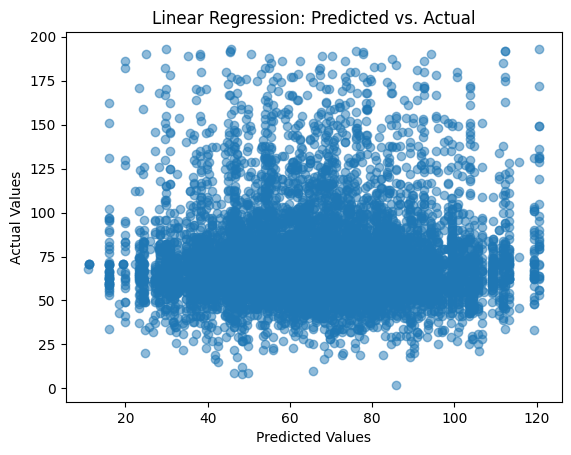

In [ ]:
plt.scatter(y_pred_test, yra_test, alpha=0.5)
plt.title('Linear Regression: Predicted vs. Actual')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Checking model performance on test and train data**

In [ ]:
print(
    pd.DataFrame(
        {
            "Data": ["Train", "Val", "Test"],
            "RMSE": [
                rmse(y_pred_train, y_observed_train),
                rmse(y_pred_val, y_observed_val),
                rmse(y_pred_test, y_observed_test),
            ],
            "MAE": [
                mae(y_pred_train, y_observed_train),
                mae(y_pred_val, y_observed_val),
                mae(y_pred_test, y_observed_test),
            ],
            "MAPE": [
                mape(y_pred_train, y_observed_train),
                mape(y_pred_val, y_observed_val),
                mape(y_pred_test, y_observed_test),
            ],
        }
    )
)

    Data       RMSE        MAE      MAPE
0  Train  32.210859  24.042234  0.444889
1    Val  32.409667  24.199183  0.449289
2   Test  32.224404  24.060442  0.441072


Based on these observations:

- The model performs consistently across different datasets (training, validation, and test) based on RMSE, MAE, and MAPE metrics.
- The RMSE and MAE values suggest that the model's predictions are, on average, around 32 units away from the true values.
- The MAPE values indicate that the model's predictions have a very low average percentage difference from the true values, suggesting good accuracy.

Overall, the model appears to be performing well and generalizing effectively to unseen data, as indicated by the consistent performance across different datasets and the low MAPE values. However, further analysis and comparison with alternative models may be needed to make a definitive conclusion about the model's performance.

**Equation of the linear regression model**

In [ ]:
# Extract coefficients from the results
coef_month = 3.7088
coef_day = 1.1995
coef_day_of_week = 6.2006
coef_origin_northeast = -4.2392
coef_origin_territories = -21.1310
coef_destination_territories = -28.1155

# Formulate the linear equation
linear_equation = f"AD_ARRIVAL_DELAY = {coef_month}*MONTH + {coef_day}*DAY + {coef_day_of_week}*DAY_OF_WEEK + {coef_origin_northeast}*Origin_Northeast + {coef_origin_territories}*Origin_Territories + {coef_destination_territories}*Destination_Territories"
print("Linear Equation:")
print(linear_equation)


Linear Equation:
AD_ARRIVAL_DELAY = 3.7088*MONTH + 1.1995*DAY + 6.2006*DAY_OF_WEEK + -4.2392*Origin_Northeast + -21.131*Origin_Territories + -28.1155*Destination_Territories


# Another Regression Model


In [ ]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
nnmodel = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
nnmodel.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_train, y_train):
        super(MetricsCallback, self).__init__()
        self.X_train = X_train
        self.y_train = y_train

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_train)
        mse = mean_squared_error(self.y_train, y_pred)
        mae = mean_absolute_error(self.y_train, y_pred)
        mape = np.mean(np.abs((self.y_train - y_pred) / self.y_train)) * 100
        print(f"Epoch {epoch + 1}: RMSE={np.sqrt(mse)}, MAE={mae}, MAPE={mape}%")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your model
nn1model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),  # Update input_shape to match the number of features
    Dense(1)  # Output layer for regression (no activation function)
])


# Compile the model
nn1model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
nn1model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                224       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
metrics_callback = MetricsCallback(XRA_train, yra_train)
nn1model.fit(XRA_train, yra_train, epochs=100, batch_size=32, validation_data=(XRA_val, yra_val), callbacks=[metrics_callback])

Epoch 1/100
939/939 [==============================] - 2s 2ms/step
Epoch 1: RMSE=23.891383380163894, MAE=16.432254328979976, MAPE=23.762719598761056%
939/939 [==============================] - 6s 5ms/step - loss: 572.0475 - mae: 16.3450 - val_loss: 595.8381 - val_mae: 16.7226
Epoch 2/100
939/939 [==============================] - 1s 1ms/step
Epoch 2: RMSE=23.882134265668576, MAE=16.277751758904497, MAPE=23.392437333047173%
939/939 [==============================] - 3s 4ms/step - loss: 571.5884 - mae: 16.3205 - val_loss: 595.8020 - val_mae: 16.5754
Epoch 3/100
939/939 [==============================] - 1s 1ms/step
Epoch 3: RMSE=23.880352678608133, MAE=16.3020661752178, MAPE=23.438550897608312%
939/939 [==============================] - 5s 5ms/step - loss: 572.0456 - mae: 16.3310 - val_loss: 595.6274 - val_mae: 16.6003
Epoch 4/100
939/939 [==============================] - 2s 3ms/step
Epoch 4: RMSE=23.91960598929657, MAE=16.69119564929775, MAPE=24.374719108183417%
939/939 [==============

In [ ]:
nn2model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(1)
])

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

nn2model.compile(optimizer=custom_optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])

In [ ]:
metrics_callback = MetricsCallback(XRA_train, yra_train)
nn2model.fit(XRA_train, yra_train, epochs=100, batch_size=512, validation_data=(XRA_val, yra_val), callbacks=[metrics_callback])

Epoch 1/100
939/939 [==============================] - 1s 1ms/step
Epoch 1: RMSE=68.45034748140962, MAE=63.96319437739368, MAPE=86.71150814764962%
59/59 [==============================] - 4s 41ms/step - loss: 68.2039 - mae: 68.7039 - val_loss: 63.7337 - val_mae: 64.2337
Epoch 2/100
939/939 [==============================] - 1s 1ms/step
Epoch 2: RMSE=57.05199091704491, MAE=51.15743740516889, MAPE=67.64475985715376%
59/59 [==============================] - 3s 49ms/step - loss: 57.5673 - mae: 58.0673 - val_loss: 50.9433 - val_mae: 51.4431
Epoch 3/100
939/939 [==============================] - 2s 2ms/step
Epoch 3: RMSE=42.925472070729775, MAE=33.9634836130034, MAPE=43.43654256309687%
59/59 [==============================] - 2s 38ms/step - loss: 42.3022 - mae: 42.8012 - val_loss: 33.7320 - val_mae: 34.2292
Epoch 4/100
939/939 [==============================] - 1s 1ms/step
Epoch 4: RMSE=35.68759027110447, MAE=26.603349091658465, MAPE=35.28399822334926%
59/59 [==============================] 

In [ ]:
yra_preds_train = nn2model.predict(XRA_train)

939/939 [==============================] - 4s 4ms/step


In [ ]:
yra_preds = nn2model.predict(XRA_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
def plot_predictions(train_data=XRA_train, train_labels=yra_train, test_data=XRA_test,  test_labels=yra_test,
                     predictions=yra_preds):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Calculate Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

In [ ]:
print(
    pd.DataFrame(
        {
            "Data": ["Train", "Test"],
            "RMSE": [
                rmse(yra_preds_train, y_observed_train),
                rmse(yra_preds, y_observed_test),
            ],
            "MAE": [
                mae(yra_preds_train, y_observed_train),
                mae(yra_preds, y_observed_test),
            ],
            "MAPE": [
                mape(yra_preds_train, y_observed_train),
                mape(yra_preds, y_observed_test),
            ],
            "R-Squared": [
                r2_score(y_observed_train, yra_preds_train),
                r2_score(y_observed_test, yra_preds),
            ],
        }
    )
)

    Data       RMSE        MAE      MAPE  R-Squared
0  Train  24.400098  15.480480  0.228580  -0.020912
1   Test  24.337467  15.617029  0.229834  -0.015554


In [ ]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    small_error_loss = 0.5 * tf.square(error)
    large_error_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(is_small_error, small_error_loss, large_error_loss)

# Calculate Huber Loss on test data
huber_loss_test = np.mean(huber_loss(y_observed_test, yra_preds))

print("Huber Loss:", huber_loss_test)

Huber Loss: 15.125379635188903
